# Imports with description

1. **Pandas** - Python's library used for data manipulation and analysis. It provides functions and structures to process data.  
2. **Matplotlib** - Python's library used for data visualization. Offers many plotting functions useful for data presentation.
3. **Seaborn** - Python's library used for data visalization - based on Matplotlib and integrates with Pandas's data structures. It helps with creating statistical graphics.
4. **Numpy** - Python's library used for numerical computing. Provides tools for creating and manipulating arrays and matrices.
5. **Typing** - Python's module which provides runtime support for type hints.
6. **Enum** - Python's module used for creating enumerated constants - sets of symbolic names (members) bound to unique values.
7. **ARIMA** - importing the ARIMA model from the time series analysis module in statsmodels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from typing import List
from enum import Enum
from statsmodels.tsa.arima.model import ARIMA

# Custom exceptions

The following are custom classes for exceptions handling.

In [ ]:
class DataFrameExtensionNotFoundException(Exception):
  """
  Exceptions occures, when user wants to save dataframe in unknown extension.
  """
  def __init__(self, message: str ="Invalid extension"):
      self.message = message
      super().__init__(self.message)

# Utility classess and functions

In [ ]:
class DataFrameSaveOptions(Enum):
  """
  Enum class that represents dataframe save formats.
  """
  CSV = 1
  EXCEL = 2
  JSON = 3

In [ ]:
class DataFrameUtility:
  @staticmethod
  def get_numerical_cols(df: pd.DataFrame) -> pd.Index:
    return df.select_dtypes(include='float64').columns

  @staticmethod
  def create_corr_matrix(df: pd.DataFrame, matrix_title: str) -> None:
    corr_matrix = df[DataFrameUtility.get_numerical_cols(df)].corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(matrix_title)
    plt.show()

  # staticmethod
  # def create_high_low_comparsion(df: pd.DataFrame, categories: List[str], heigh_column_name: str, low_column_name: str, categorical_column_name: str, entity_column_name: str) -> None:
  #   for category in categories:
  #       category_df = df[df[categorical_column_name] == category]

  #       fig, ax = plt.subplots(figsize=(8, 6))
  #       sns.barplot(data=category_df, x=entity_column_name, y=heigh_column_name, ax=ax, color='red', label='Highest')
  #       sns.barplot(data=category_df, x=entity_column_name, y=low_column_name, ax=ax, color='orange', label='Lowest')

  #       plt.title(f'Highest and Lowest Values for {category}')
  #       plt.xlabel('Country')
  #       plt.ylabel('Value')
  #       plt.xticks(rotation=90, ha='right', fontsize=4)
  #       plt.legend()
  #       plt.tight_layout()
  #       plt.show()

  @staticmethod
  def save_data_frame_to_desired_format(df: pd.DataFrame, option: int, file_name: str) -> None:
    file_extension = {
        DataFrameSaveOptions.CSV: '.csv',
        DataFrameSaveOptions.EXCEL: '.xlsx',
        DataFrameSaveOptions.JSON: '.json'
    }.get(option, None)

    if file_extension is None:
      raise DataFrameExtensionNotFoundException('Invalid save operation')

    file_name = f'{file_name}{file_extension}'

    match option:
      case DataFrameSaveOptions.CSV:
        df.to_csv(file_name, index=False)

      case DataFrameSaveOptions.EXCEL:
        df.to_excel(file_name, index=False)

      case DataFrameSaveOptions.JSON:
        df.to_json(file_name, index=False)

      case _:
        raise DataFrameExtensionNotFoundException('Invalid save operation')

In [ ]:
class PolishDeathDataFrameUtility:
  @staticmethod
  def create_line_plot_through_years(data_frame: pd.DataFrame, y_value: str, title: str) -> None:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=data_frame, x='Year', y=y_value)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(y_value)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()
    plt.show()

  @staticmethod
  def create_predictions(data_frame: pd.DataFrame) -> None:
    for col in data_frame.columns[2:]:
      prediction_values = data_frame[col].reset_index(drop=True)
      prediction_df = pd.DataFrame(prediction_values, columns=[col])
      prediction_df['Year'] = pd.to_datetime(data_frame['Year'], format='%Y')
      prediction_df.set_index('Year', inplace=True)
      model = ARIMA(prediction_df[col], order=(5,1,0))
      model_fit = model.fit()
      forecast = model_fit.forecast(steps=7)
      print(f'FORECAST FOR: {col}')
      print(forecast)

In [ ]:
from abc import ABC, abstractmethod
from dataclasses import dataclass

@dataclass(frozen=True)
class DataFrameProcessor(ABC):
  """
  Base class for processing dataframes.
  """
  df: pd.DataFrame

  @abstractmethod
  def create_processed_data_frame_description(self) -> None:
    """
    Method should create a dataframe description.

    Returns:
      None: Method returns nothing.
    """
    ...


In [ ]:
from dataclasses import dataclass
from typing import List

@dataclass(frozen=True)
class DeathDataFrameProcessor(DataFrameProcessor):
  """
  Class for processing dataframes, from file: number-of-deaths-by-risk-factor.csv
  """
  def create_processed_data_frame_description(self) -> pd.DataFrame:
    stats_df_columns: List[str] = ['Entity', 'Column', 'Highest Value', 'Lowest Value']
    country_extremes = pd.DataFrame(columns=stats_df_columns)
    for column in self.df.columns[2:]:
      country_stats = df.groupby('Entity')[column].agg(['max', 'min']).reset_index()
      country_stats.columns = [col for col in stats_df_columns if col != 'Column']
      country_stats['Column'] = column
      country_extremes = pd.concat([country_extremes, country_stats], ignore_index=True)

    return country_extremes.sort_values(by='Entity')


# Dataset investigation

**Paths**

In [ ]:
from typing import Final
CSV_DATA_PATH: Final[str] = '/content/number-of-deaths-by-risk-factor.csv'

**Static variables**

In [ ]:
CORR_MATRIX_TITLE: Final[str] = 'Correlation Matrix'

**Basic data inspect**

In [ ]:
df = pd.read_csv(CSV_DATA_PATH);
df.head()

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.049543,5887.747628,5412.314513,22388.49723,3221.138842,156.097553,22778.84925,10408.43885,...,28183.98335,6393.667372,726.431294,9344.131952,374.844056,26598.00673,4383.83,2737.197934,11381.37735,7299.867330
1,Afghanistan,1991,7359.676749,5732.770160,5287.891103,22128.75821,3150.559597,151.539851,22292.69111,10271.97643,...,28435.39751,6429.253320,739.245799,9330.182378,379.854237,26379.53222,4426.36,2741.184956,11487.83239,7386.764303
2,Afghanistan,1992,7650.437822,5954.804987,5506.657363,22873.76879,3331.349048,156.609194,23102.19794,10618.87978,...,29173.61120,6561.054957,873.485341,9769.844533,388.130434,27263.12791,4568.91,2798.560245,11866.23557,7640.628526
3,Afghanistan,1993,10270.731380,7986.736613,7104.620351,25599.75628,4477.006100,206.834451,27902.66996,12260.09384,...,30074.76091,6731.972560,1040.047422,11433.769490,405.577931,30495.56150,5080.29,2853.301679,12335.96168,7968.311853
4,Afghanistan,1994,11409.177110,8863.010065,8051.515953,28013.16720,5102.622054,233.930571,32929.00593,14197.94796,...,30809.49117,6889.328118,1101.764645,12936.955860,415.349195,33323.16140,5499.23,2880.025765,12672.95019,8244.368430


In [ ]:
numerical_cols = DataFrameUtility.get_numerical_cols(df)
numerical_cols

Index(['Unsafe water source', 'Unsafe sanitation',
       'No access to handwashing facility',
       'Household air pollution from solid fuels',
       'Non-exclusive breastfeeding', 'Discontinued breastfeeding',
       'Child wasting', 'Child stunting', 'Low birth weight for gestation',
       'Secondhand smoke', 'Alcohol use', 'Drug use', 'Diet low in fruits',
       'Diet low in vegetables', 'Unsafe sex', 'Low physical activity',
       'High fasting plasma glucose', 'High total cholesterol',
       'High body-mass index', 'High systolic blood pressure', 'Smoking',
       'Iron deficiency', 'Vitamin A deficiency', 'Low bone mineral density',
       'Air pollution', 'Outdoor air pollution', 'Diet high in sodium',
       'Diet low in whole grains', 'Diet low in nuts and seeds'],
      dtype='object')

In [ ]:
df.isnull().sum()

Entity                                         0
Year                                           0
Unsafe water source                            0
Unsafe sanitation                              0
No access to handwashing facility              0
Household air pollution from solid fuels       0
Non-exclusive breastfeeding                    0
Discontinued breastfeeding                     0
Child wasting                                  0
Child stunting                                 0
Low birth weight for gestation                 0
Secondhand smoke                               0
Alcohol use                                    0
Drug use                                       0
Diet low in fruits                             0
Diet low in vegetables                         0
Unsafe sex                                     0
Low physical activity                          0
High fasting plasma glucose                    0
High total cholesterol                      4907
High body-mass index

In [ ]:
df.describe()

,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,...,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6.468000e+03,6.467000e+03,6.468000e+03,6.468000e+03,6.468000e+03
mean,2003.500000,3.156632e+04,2.337436e+04,1.893305e+04,4.308421e+04,6231.427632,409.110423,4.344643e+04,1.176772e+04,3.094801e+04,...,1.743832e+05,1.335483e+05,1878.745701,11908.622027,4579.055654,9.573551e+04,5.557313e+04,5.424067e+04,5.334881e+04,3.496704e+04
std,8.078372,1.527731e+05,1.144930e+05,8.981037e+04,1.877345e+05,28517.846341,1874.989431,2.022367e+05,5.824891e+04,1.342946e+05,...,6.809915e+05,5.299315e+05,9011.891580,58801.648611,18884.513384,3.909335e+05,2.298038e+05,2.434373e+05,2.097153e+05,1.359432e+05
min,1990.000000,8.650193e-03,6.495981e-03,7.791357e-02,2.058533e-02,0.003816,0.000520,1.017127e-01,1.400828e-03,3.266384e-01,...,2.102607e+01,1.170748e+01,0.005499,0.003465,0.381232,8.524593e+00,4.830000e+00,2.673823e+00,9.317592e+00,5.188788e+00
25%,1996.750000,1.019665e+01,4.603845e+00,1.688487e+01,8.759783e+01,4.633254,0.264366,4.137245e+01,1.863717e+00,1.445628e+02,...,2.665313e+03,1.292926e+03,2.256209,1.896386,40.602658,1.076837e+03,5.537050e+02,3.556373e+02,7.987349e+02,5.533485e+02
50%,2003.500000,2.790317e+02,1.601965e+02,2.524991e+02,1.091671e+03,102.428307,6.619327,7.303462e+02,7.787362e+01,1.220717e+03,...,1.099331e+04,5.935789e+03,31.990666,70.490245,246.750756,6.125098e+03,2.242020e+03,1.945638e+03,3.504309e+03,2.279157e+03
75%,2010.250000,5.301718e+03,3.832344e+03,3.811442e+03,9.161964e+03,1367.827277,78.279446,1.023454e+04,1.971596e+03,8.708146e+03,...,4.732284e+04,3.163810e+04,421.383585,2081.946722,1096.103891,2.272736e+04,1.282150e+04,9.691376e+03,1.446369e+04,1.003880e+04
max,2017.000000,2.111659e+06,1.638021e+06,1.239519e+06,2.708905e+06,514102.351600,34850.395530,3.365309e+06,1.001277e+06,1.976613e+06,...,1.044082e+07,7.099111e+06,125242.948300,986994.996200,327314.262600,4.895476e+06,3.408878e+06,3.196514e+06,3.065589e+06,2.062522e+06


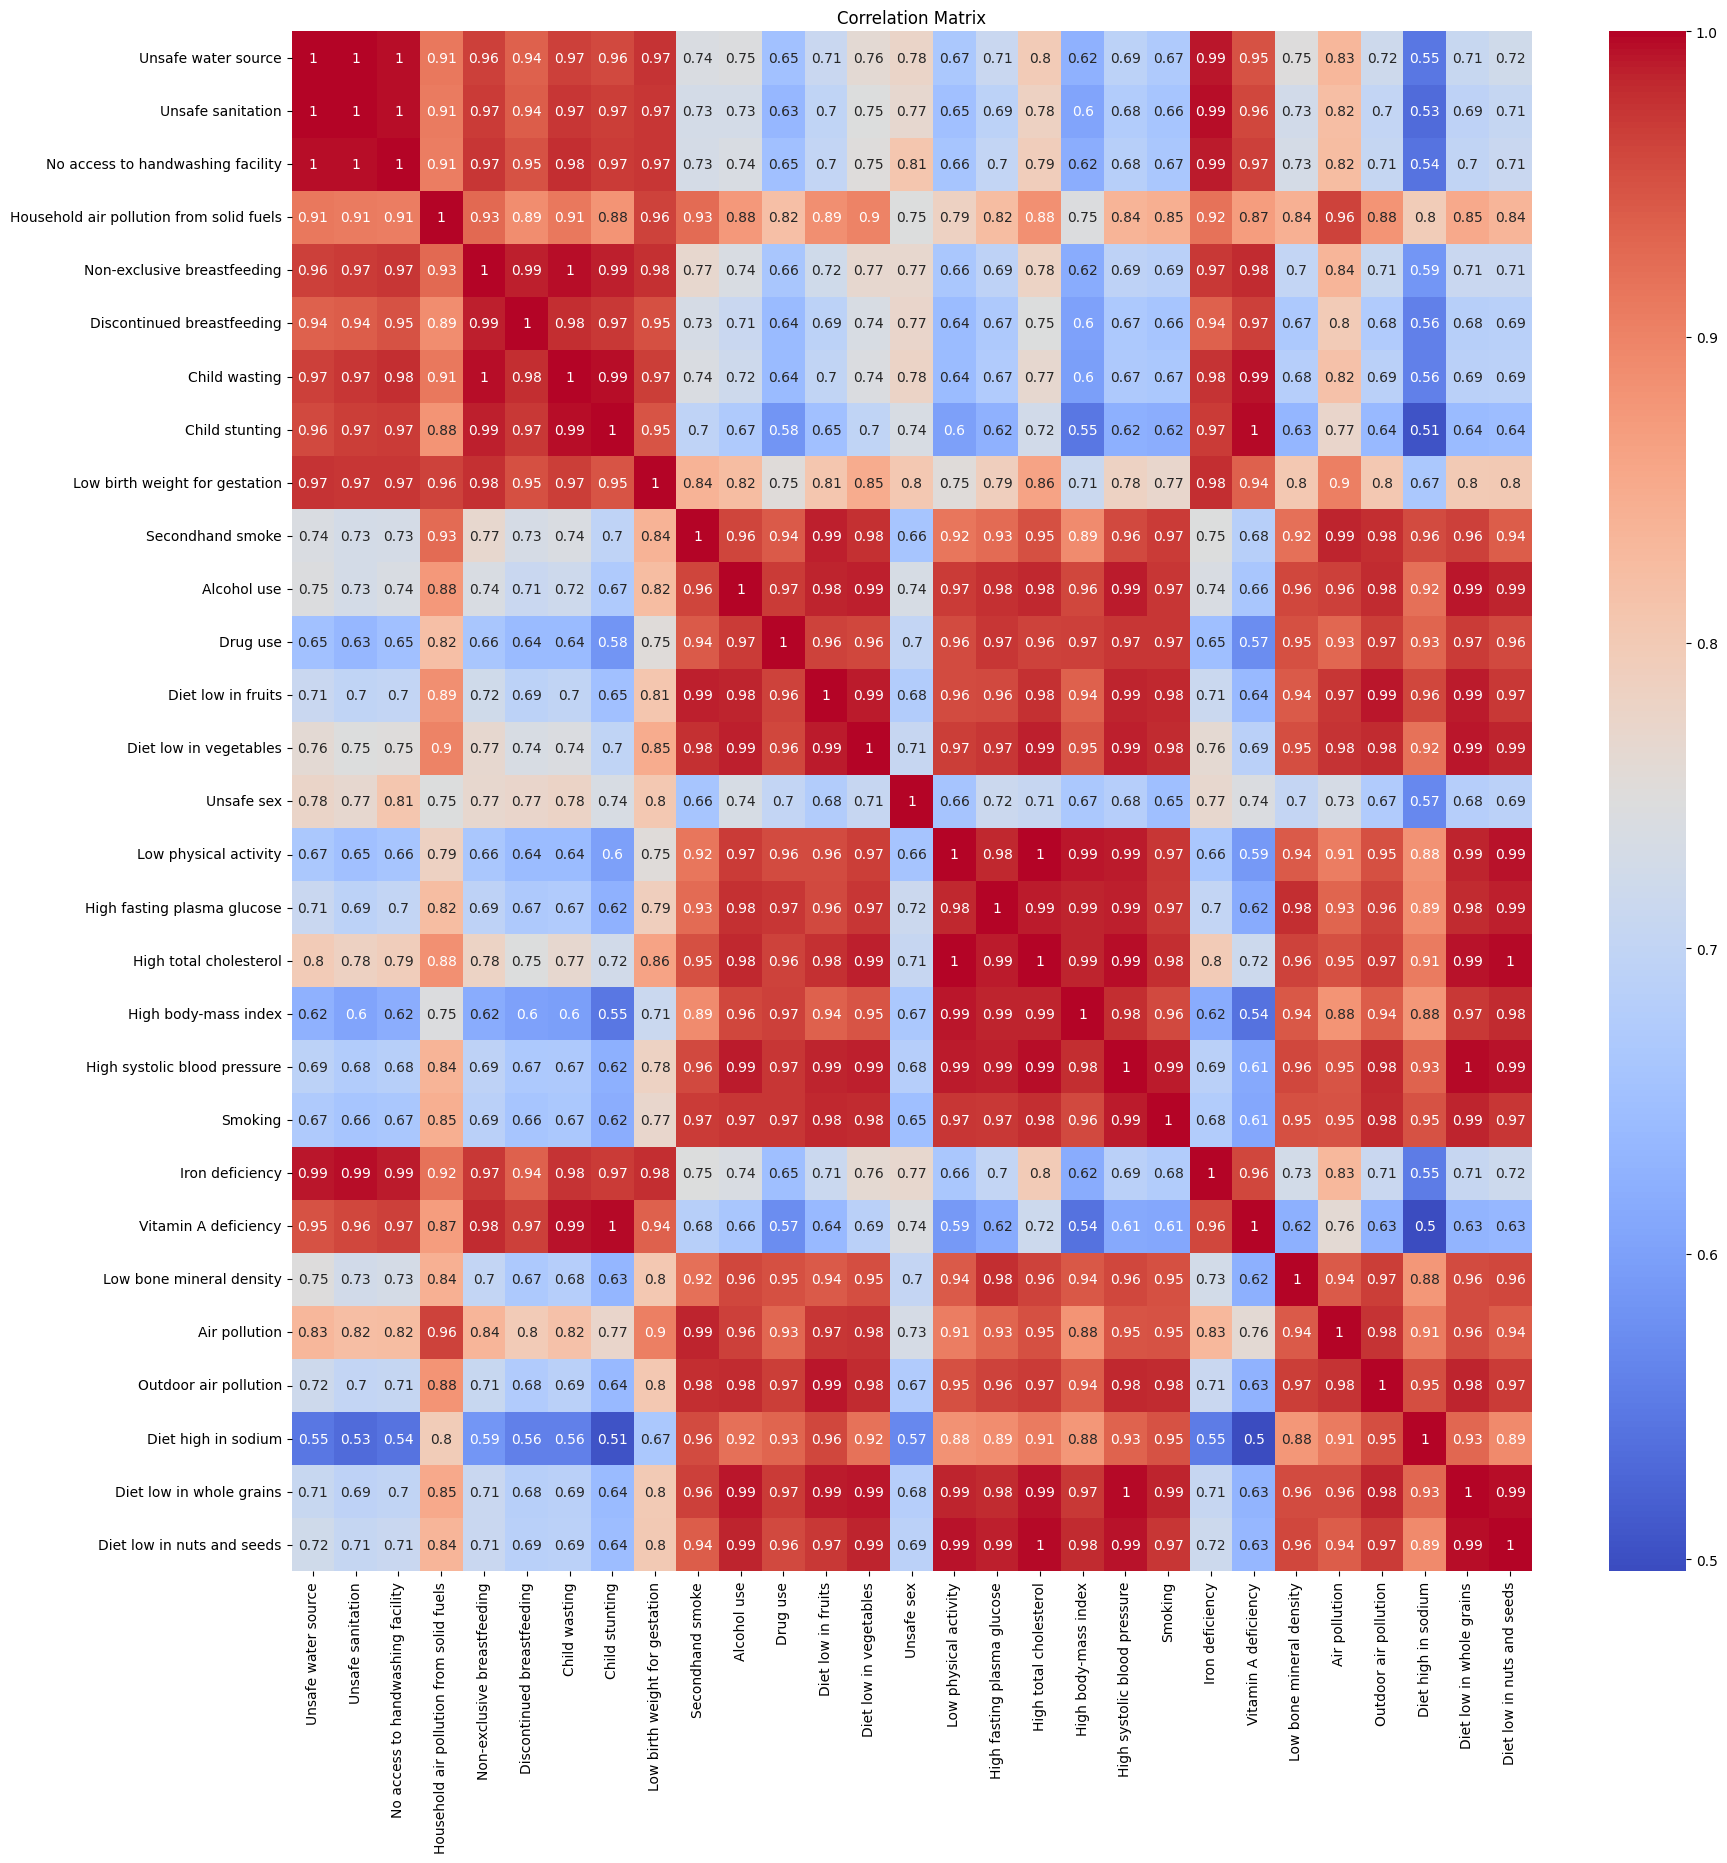

In [ ]:
DataFrameUtility.create_corr_matrix(df, CORR_MATRIX_TITLE)



Looking from the left top corner of the correlation matrix, we are able to notice connection between causes related to lack of hygiene, malnutrition of newly-born or yet-to-be-born children and lack of iron or vitamin A. In my opinion it's this part of data is related to poorer regions in our world where access to clean water and enough amount of food is a struggle.


Another strong connection between causes of death is in the center of the whole matrix. There's a strong connection between causes related to obesity/low physical activity, causes centered around addictions like smoking or alcohol usage and diet, air pollution and few diets unfavourable for one's health.
Most of them are more or less predictable. Like smoking having a connection with air pollution and other addictions like drinking alcohol. Diets - diet without vegetables, one without fruits and other ones on the right of the center of the matrix. In our opinion the most common cause of this connection is unbalanced diet that lead to other problems. Obesity, than problems with rarer physical activity, problems with mental health, resorting to stimulants like alcohol or smoking.

One of the more surprising results is with those few diets and iron or vitamin A deficiency. Taking into consideration that products that are excluded in those diets are also good sources of iron like nuts or strawberries. Probably those peoples' diet is centered around meat which is also a good source of iron and could easily explain correlation to causes related to obesity. But it doesn't explain why lack of vitamin A is connected with those diets so little. Vitamin A's sources are mostly some fruits and vegetables like carrot, lettuce, tomatos or spinach.
Another surprising connection is one between obesity causes and air pollution. One would think that people having obesity problems wouldn't be eager to have much physical activity or just go outside for long. Another factor could be that the air quality decreased so much that many people have health problems caused by air pollution even though they decreased time spent outside of their homes.




# Pre-Processing

In [ ]:
df[numerical_cols] = df[numerical_cols].round(2)
df

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Afghanistan,1990,7554.05,5887.75,5412.31,22388.50,3221.14,156.10,22778.85,10408.44,...,28183.98,6393.67,726.43,9344.13,374.84,26598.01,4383.83,2737.20,11381.38,7299.87
1,Afghanistan,1991,7359.68,5732.77,5287.89,22128.76,3150.56,151.54,22292.69,10271.98,...,28435.40,6429.25,739.25,9330.18,379.85,26379.53,4426.36,2741.18,11487.83,7386.76
2,Afghanistan,1992,7650.44,5954.80,5506.66,22873.77,3331.35,156.61,23102.20,10618.88,...,29173.61,6561.05,873.49,9769.84,388.13,27263.13,4568.91,2798.56,11866.24,7640.63
3,Afghanistan,1993,10270.73,7986.74,7104.62,25599.76,4477.01,206.83,27902.67,12260.09,...,30074.76,6731.97,1040.05,11433.77,405.58,30495.56,5080.29,2853.30,12335.96,7968.31
4,Afghanistan,1994,11409.18,8863.01,8051.52,28013.17,5102.62,233.93,32929.01,14197.95,...,30809.49,6889.33,1101.76,12936.96,415.35,33323.16,5499.23,2880.03,12672.95,8244.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6463,Zimbabwe,2013,4254.28,2977.65,3913.21,7613.56,1037.97,59.15,7703.06,1317.30,...,11077.33,9099.55,382.54,1130.71,238.30,9593.03,2053.58,1018.39,2687.64,2409.93
6464,Zimbabwe,2014,4098.77,2856.43,3809.25,7429.45,972.89,54.33,7401.06,1259.99,...,11015.12,8902.22,353.39,1094.27,237.53,9387.19,2030.92,1016.41,2654.38,2399.26
6465,Zimbabwe,2015,3921.29,2717.74,3688.44,7267.03,912.25,50.26,7100.48,1205.59,...,11005.41,8818.57,332.36,1068.81,240.66,9189.34,1994.91,1019.97,2635.95,2398.53
6466,Zimbabwe,2016,3802.26,2624.32,3603.18,7134.60,875.71,47.72,6823.77,1099.87,...,11096.18,8758.49,319.69,950.22,244.72,9092.58,2030.88,1032.18,2641.38,2417.42


In [ ]:
death_df = DeathDataFrameProcessor(df)

In [ ]:
high_low_deaths_df = death_df.create_processed_data_frame_description()
high_low_deaths_df

,Entity,Column,Highest Value,Lowest Value
0,Afghanistan,Unsafe water source,12676.65,5158.40
3465,Afghanistan,Low physical activity,4977.84,4221.30
1617,Afghanistan,Child stunting,16729.54,4990.04
4158,Afghanistan,High body-mass index,19254.96,7701.58
2541,Afghanistan,Drug use,862.30,208.33
...,...,...,...,...
461,Zimbabwe,Unsafe sanitation,5467.33,1794.03
3695,Zimbabwe,Low physical activity,890.17,405.45
3002,Zimbabwe,Diet low in fruits,3660.49,1602.52
2540,Zimbabwe,Alcohol use,8647.70,2973.65


In [ ]:
high_low_deaths_df[high_low_deaths_df['Entity'] == 'Poland']

,Entity,Column,Highest Value,Lowest Value
3166,Poland,Diet low in vegetables,17246.08,9768.56
2704,Poland,Drug use,2589.38,1351.53
625,Poland,No access to handwashing facility,73.24,48.80
856,Poland,Household air pollution from solid fuels,9650.86,2399.67
6169,Poland,Diet high in sodium,22691.68,17676.83
2242,Poland,Secondhand smoke,12890.08,7935.86
1780,Poland,Child stunting,53.22,3.31
2935,Poland,Diet low in fruits,31406.66,20856.13
394,Poland,Unsafe sanitation,34.56,4.47
5245,Poland,Vitamin A deficiency,82.25,4.57


In [ ]:
DataFrameUtility.save_data_frame_to_desired_format(high_low_deaths_df, DataFrameSaveOptions.EXCEL, 'high_low_deaths_amount_per_country')

In [ ]:
pd.unique(high_low_deaths_df['Column'])

array(['Unsafe water source', 'Low physical activity', 'Child stunting',
       'High body-mass index', 'Drug use', 'Air pollution',
       'Discontinued breastfeeding', 'Child wasting',
       'Low bone mineral density', 'Non-exclusive breastfeeding',
       'High fasting plasma glucose', 'Diet low in vegetables',
       'Outdoor air pollution', 'No access to handwashing facility',
       'Diet low in whole grains', 'Vitamin A deficiency',
       'Household air pollution from solid fuels', 'Diet high in sodium',
       'Unsafe sex', 'Smoking', 'Alcohol use',
       'Low birth weight for gestation', 'Unsafe sanitation',
       'Diet low in nuts and seeds', 'High systolic blood pressure',
       'Secondhand smoke', 'Iron deficiency', 'High total cholesterol',
       'Diet low in fruits'], dtype=object)

# Detailed analysis for Poland

In [ ]:
# Extracting data for poland and formatting
poland_df = df[df['Entity'] == 'Poland'].reset_index(drop=True)
cause_columns = poland_df.columns[2:]
poland_df[cause_columns] = poland_df[cause_columns].apply(pd.to_numeric)
# Filling nans with -1 value, otherwise we cannot use argmax later
poland_df.fillna(-1, inplace=True)
poland_df

,Entity,Year,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,...,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
0,Poland,1990,75.22,34.56,73.24,9650.86,92.67,4.90,377.93,53.22,...,122642.83,98975.91,36.69,82.25,2155.67,34498.70,25192.76,21995.19,40440.31,31640.36
1,Poland,1991,68.30,30.20,71.44,9579.30,80.66,4.28,334.08,45.85,...,127044.82,102434.13,36.96,70.74,2265.65,35611.15,26374.98,22691.68,42238.82,32958.72
2,Poland,1992,60.91,25.54,66.50,8856.47,68.73,3.73,291.30,38.66,...,123711.19,99147.92,33.57,59.56,2262.65,34340.15,25805.60,22055.15,41089.66,31972.03
3,Poland,1993,51.62,20.39,61.82,8046.76,55.99,3.01,242.66,30.99,...,119204.38,94784.41,31.34,47.48,2239.71,32702.96,24960.13,21083.49,39350.85,30554.80
4,Poland,1994,46.86,17.32,59.76,7528.33,55.44,2.83,247.66,30.97,...,117640.92,93420.14,31.24,46.44,2281.22,32021.14,24786.25,20707.54,38710.85,29940.65
5,Poland,1995,39.09,13.57,58.25,7140.41,42.33,2.24,204.78,24.06,...,117442.71,93963.86,28.17,35.88,2316.62,31830.91,24981.86,20642.18,38584.35,29705.42
6,Poland,1996,34.69,11.65,57.34,6576.58,36.95,1.91,189.71,21.16,...,114225.56,91184.80,24.39,31.09,2301.33,30841.57,24548.72,20090.70,37263.01,28528.13
7,Poland,1997,30.31,9.78,55.73,6130.81,28.88,1.56,164.32,16.67,...,112666.64,90668.15,16.63,24.39,2327.89,30398.65,24551.03,19876.11,36635.54,27755.74
8,Poland,1998,26.76,8.29,54.62,5644.59,24.41,1.32,154.92,14.24,...,109141.65,88615.61,12.26,20.52,2324.22,29391.12,24024.74,19325.31,35237.81,26378.15
9,Poland,1999,24.30,7.26,55.59,5297.15,21.31,1.13,153.55,12.48,...,109243.84,89133.91,8.43,17.75,2411.64,29320.57,24306.11,19368.79,35007.19,25886.60


**Check datatypes, before extracting max values**

In [ ]:
poland_df.dtypes

Entity                                       object
Year                                          int64
Unsafe water source                         float64
Unsafe sanitation                           float64
No access to handwashing facility           float64
Household air pollution from solid fuels    float64
Non-exclusive breastfeeding                 float64
Discontinued breastfeeding                  float64
Child wasting                               float64
Child stunting                              float64
Low birth weight for gestation              float64
Secondhand smoke                            float64
Alcohol use                                 float64
Drug use                                    float64
Diet low in fruits                          float64
Diet low in vegetables                      float64
Unsafe sex                                  float64
Low physical activity                       float64
High fasting plasma glucose                 float64
High total c

In [ ]:
poland_df.isna().sum()

Entity                                      0
Year                                        0
Unsafe water source                         0
Unsafe sanitation                           0
No access to handwashing facility           0
Household air pollution from solid fuels    0
Non-exclusive breastfeeding                 0
Discontinued breastfeeding                  0
Child wasting                               0
Child stunting                              0
Low birth weight for gestation              0
Secondhand smoke                            0
Alcohol use                                 0
Drug use                                    0
Diet low in fruits                          0
Diet low in vegetables                      0
Unsafe sex                                  0
Low physical activity                       0
High fasting plasma glucose                 0
High total cholesterol                      0
High body-mass index                        0
High systolic blood pressure      

**Extracting max value with cause for each year**

As we can see below.
For each year "High systolic blood pressure" is the reason for most deaths in Poland, but its value is decreasing through years.

In [ ]:
max_values = poland_df.apply(lambda row: row[cause_columns].max(), axis=1)
max_labels = poland_df[cause_columns].idxmax(axis=1)
max_df = pd.concat([max_values, max_labels], axis=1)
max_df.columns = ['Max Value', 'Cause']
max_df['Year'] = poland_df['Year']
max_df

,Max Value,Cause,Year
0,122642.83,High systolic blood pressure,1990
1,127044.82,High systolic blood pressure,1991
2,123711.19,High systolic blood pressure,1992
3,119204.38,High systolic blood pressure,1993
4,117640.92,High systolic blood pressure,1994
5,117442.71,High systolic blood pressure,1995
6,114225.56,High systolic blood pressure,1996
7,112666.64,High systolic blood pressure,1997
8,109141.65,High systolic blood pressure,1998
9,109243.84,High systolic blood pressure,1999


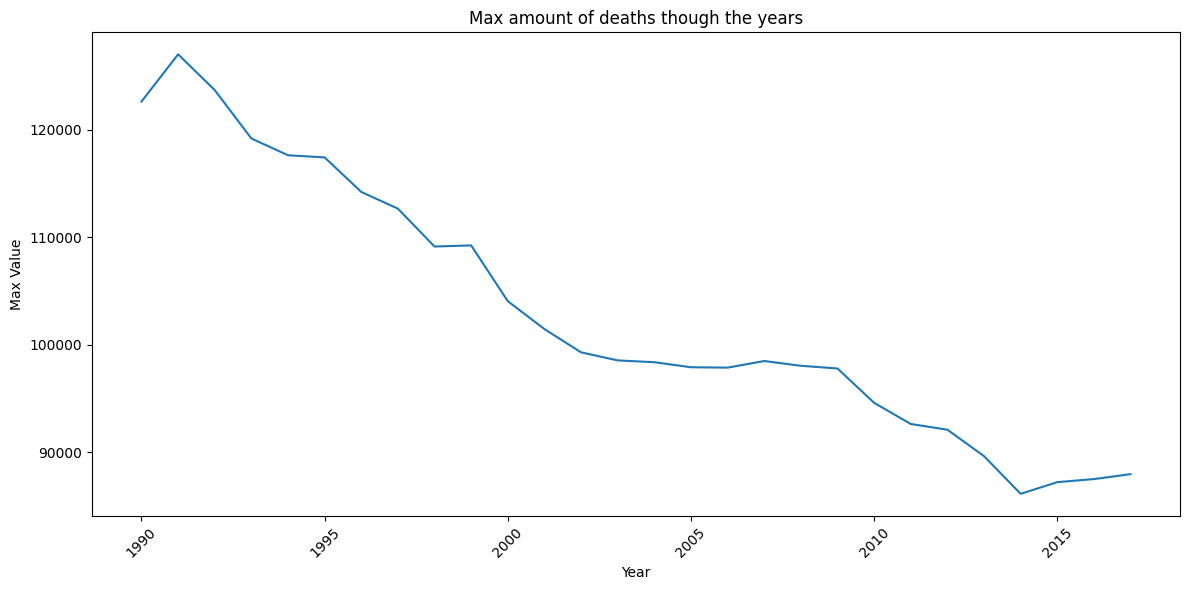

In [ ]:
PolishDeathDataFrameUtility.create_line_plot_through_years(max_df, 'Max Value', 'Max amount of deaths though the years')

**Inspect each column through years**

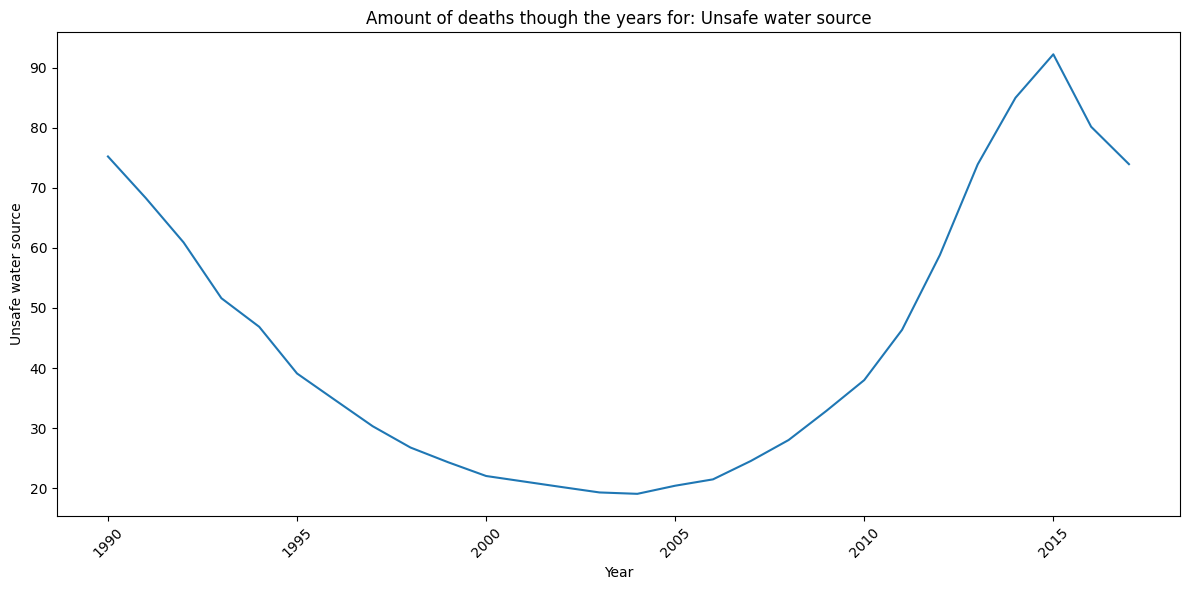

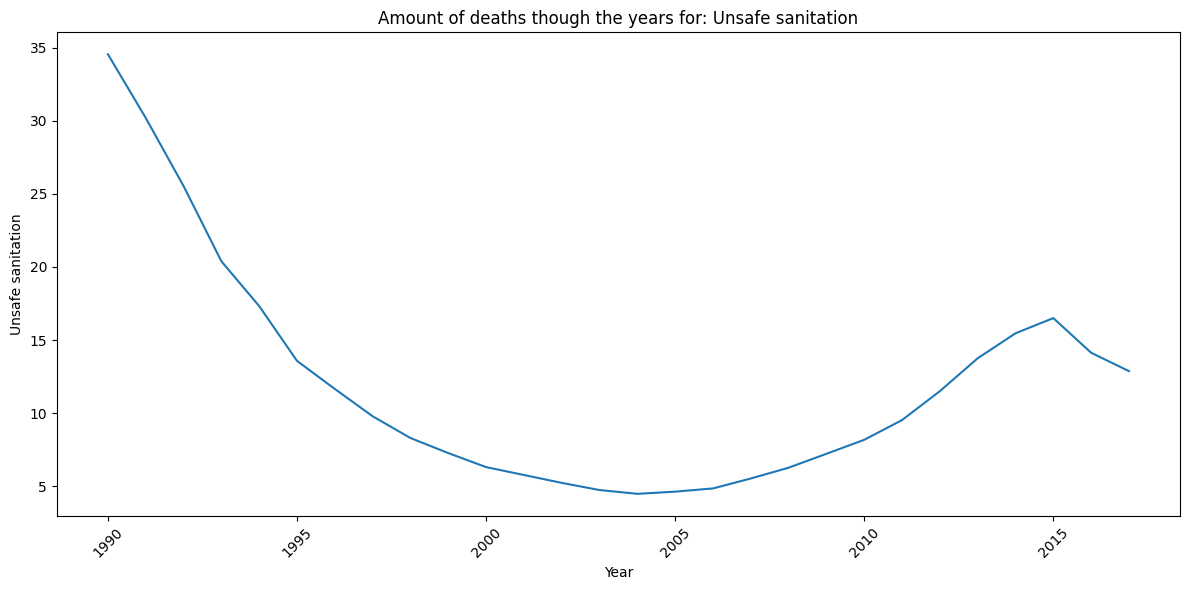

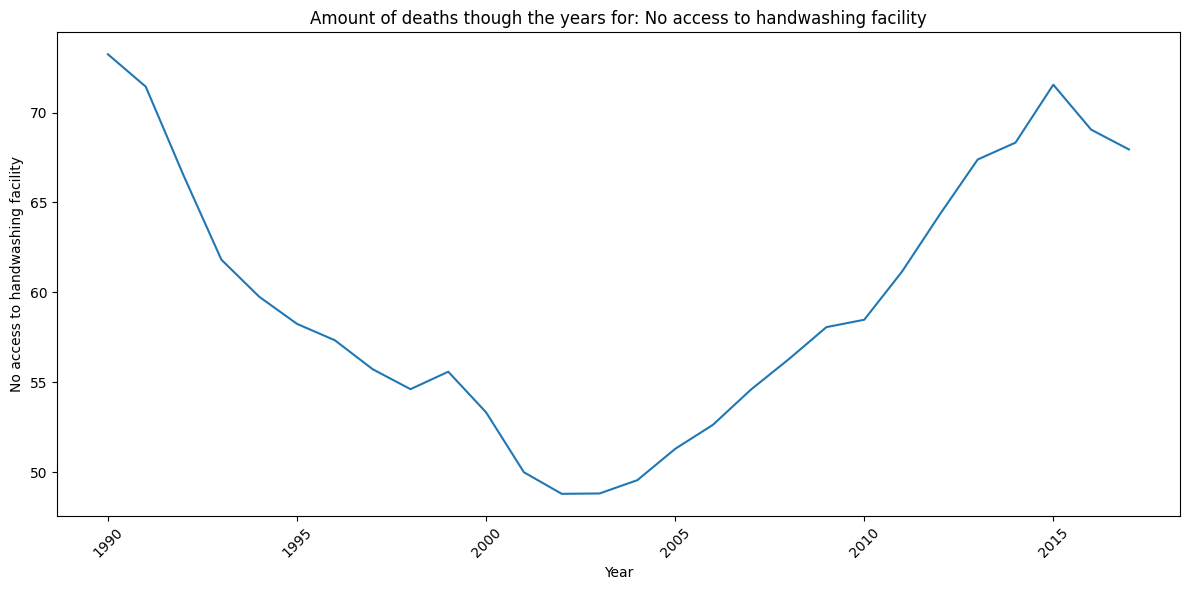

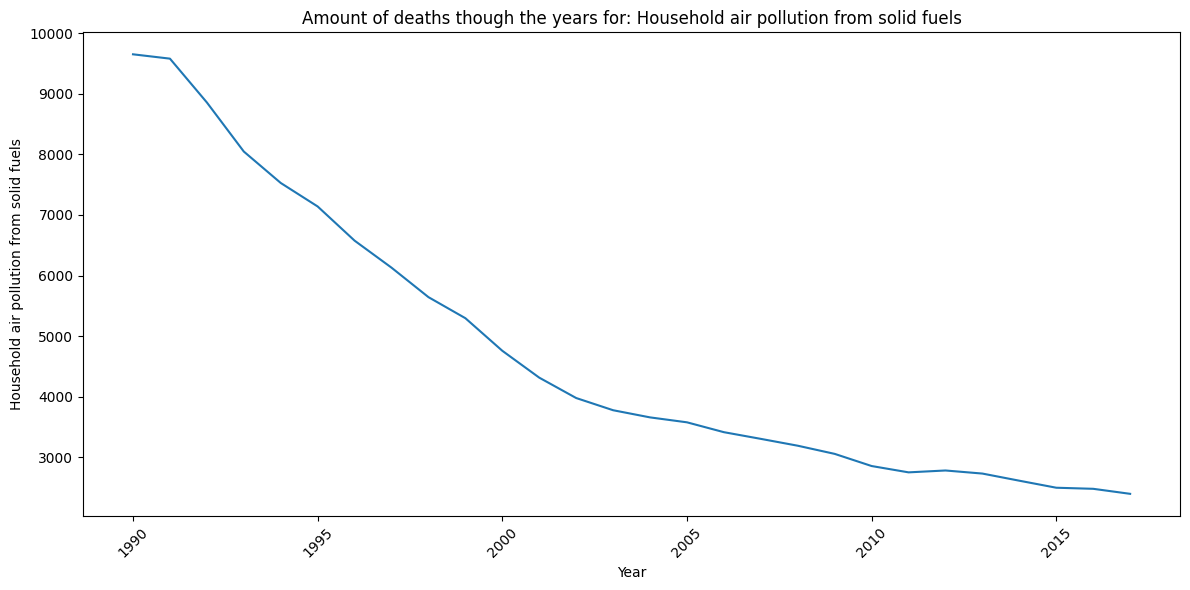

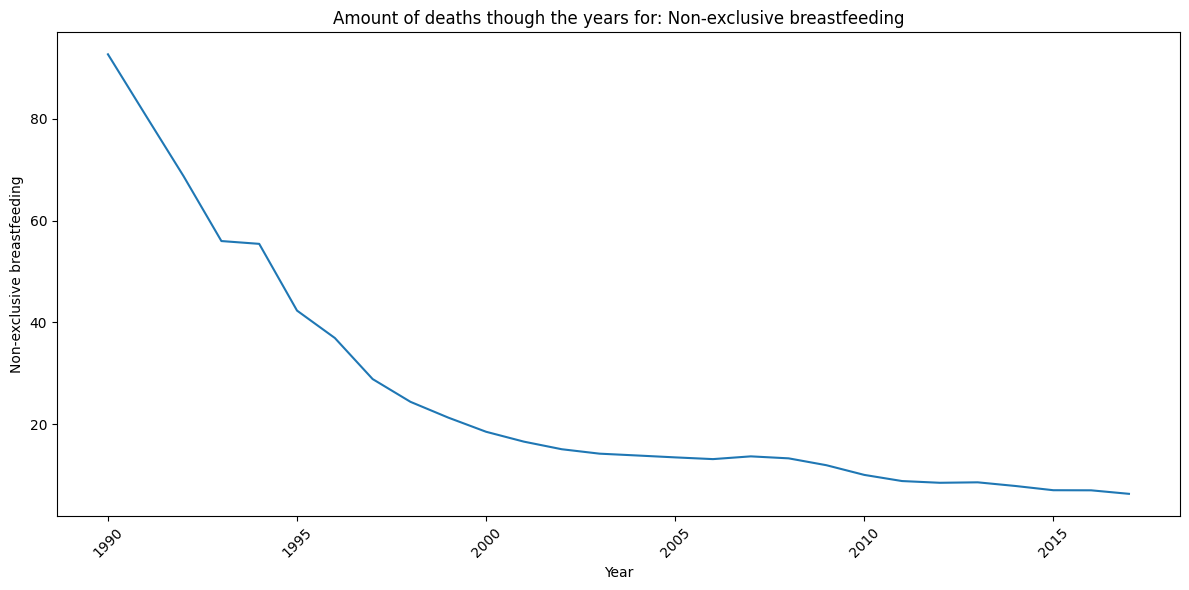

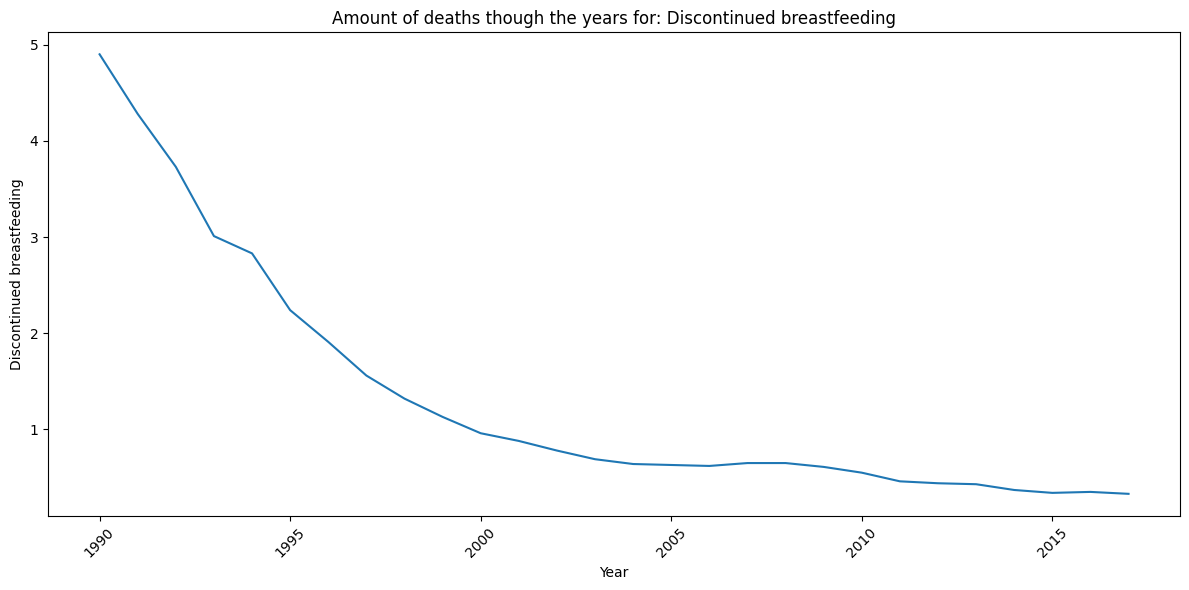

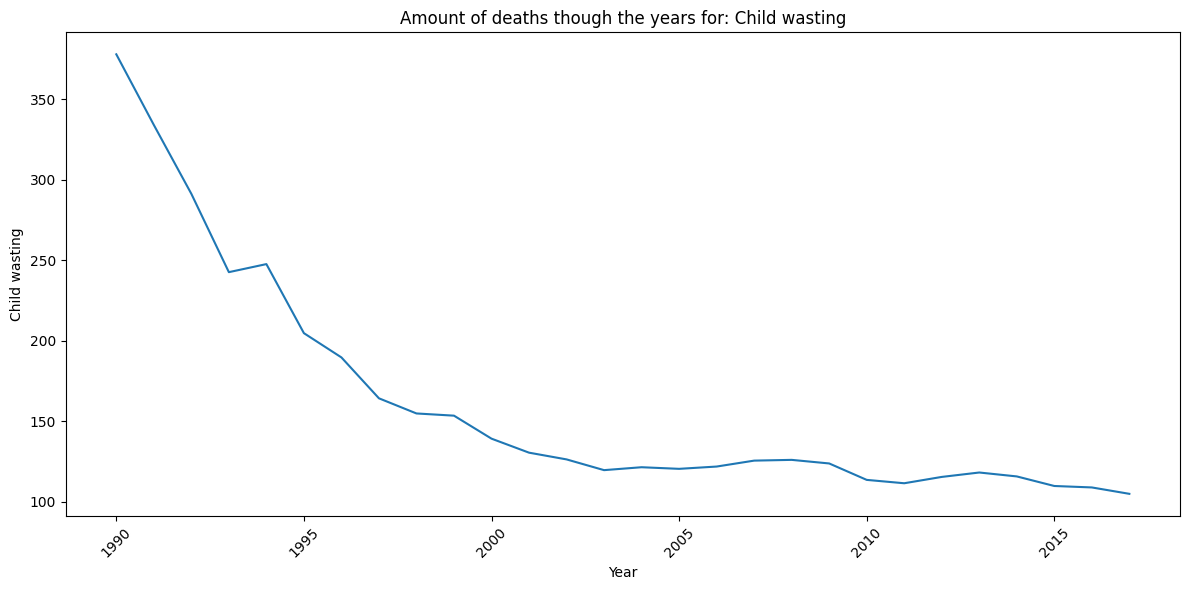

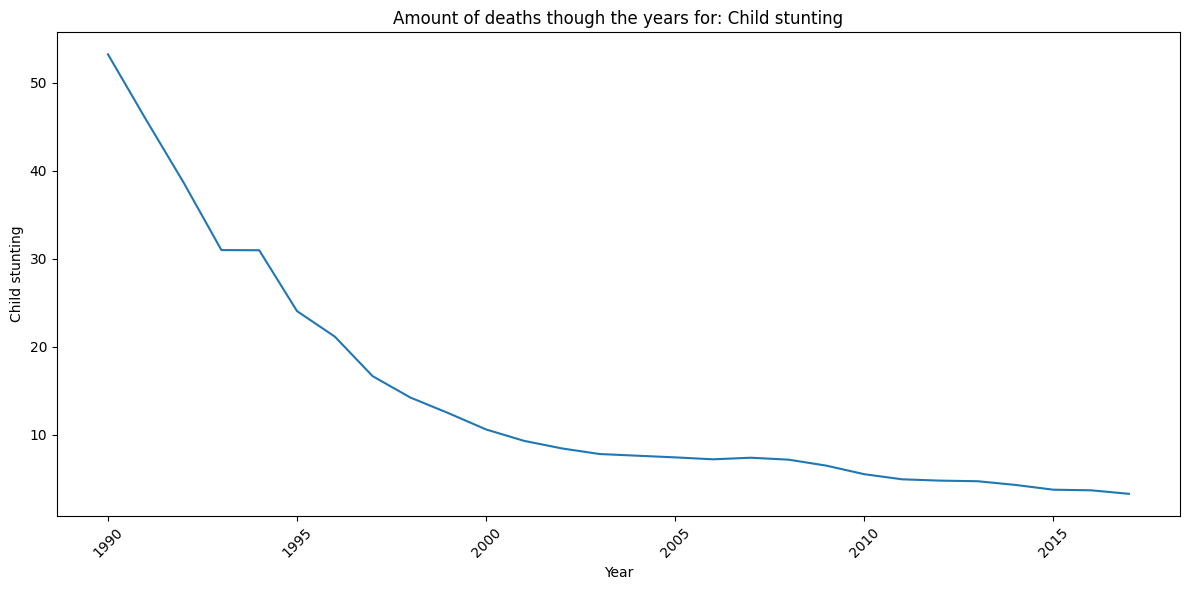

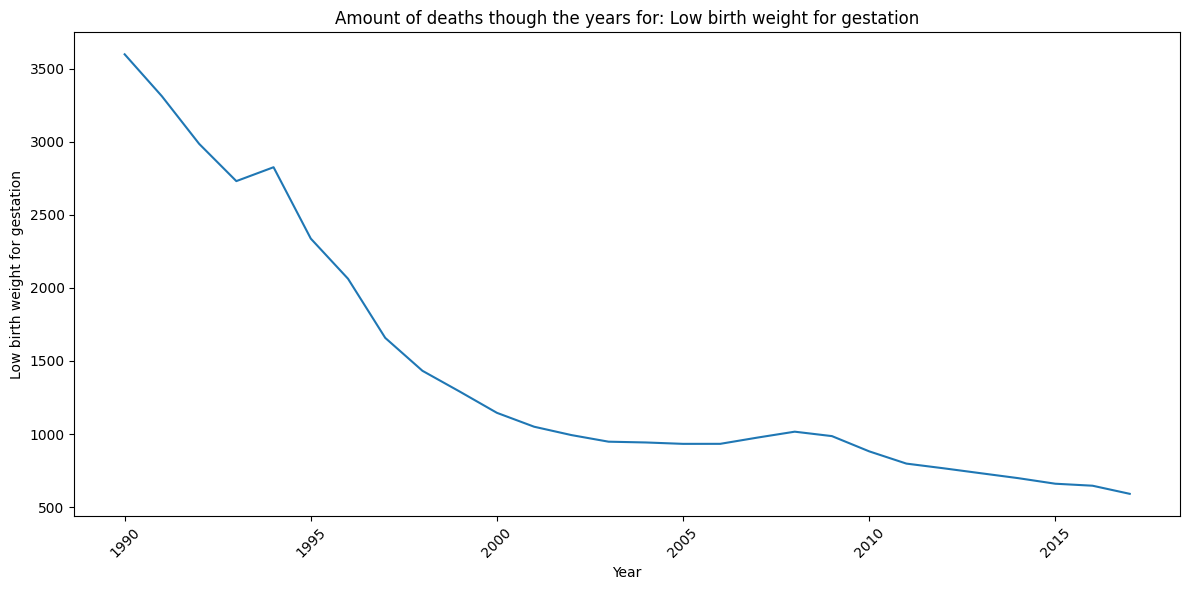

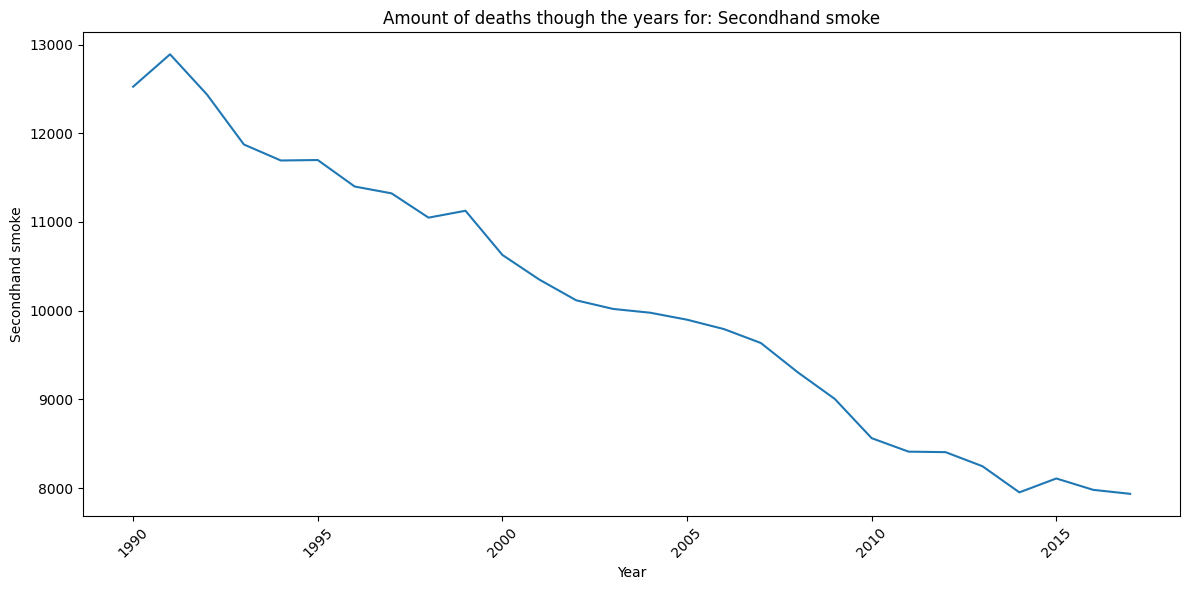

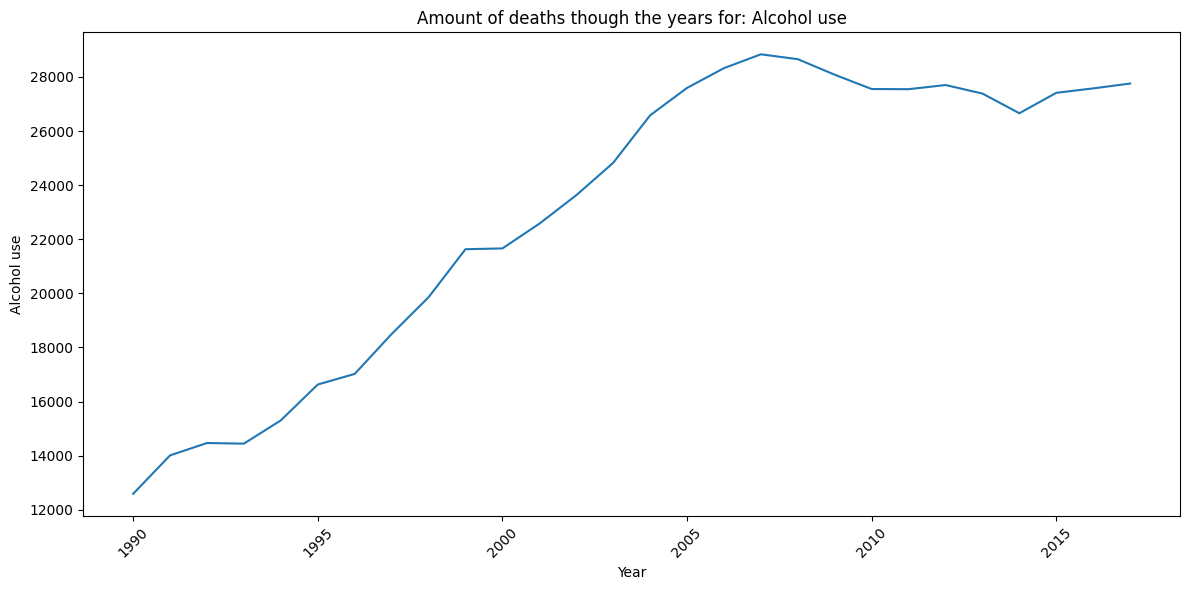

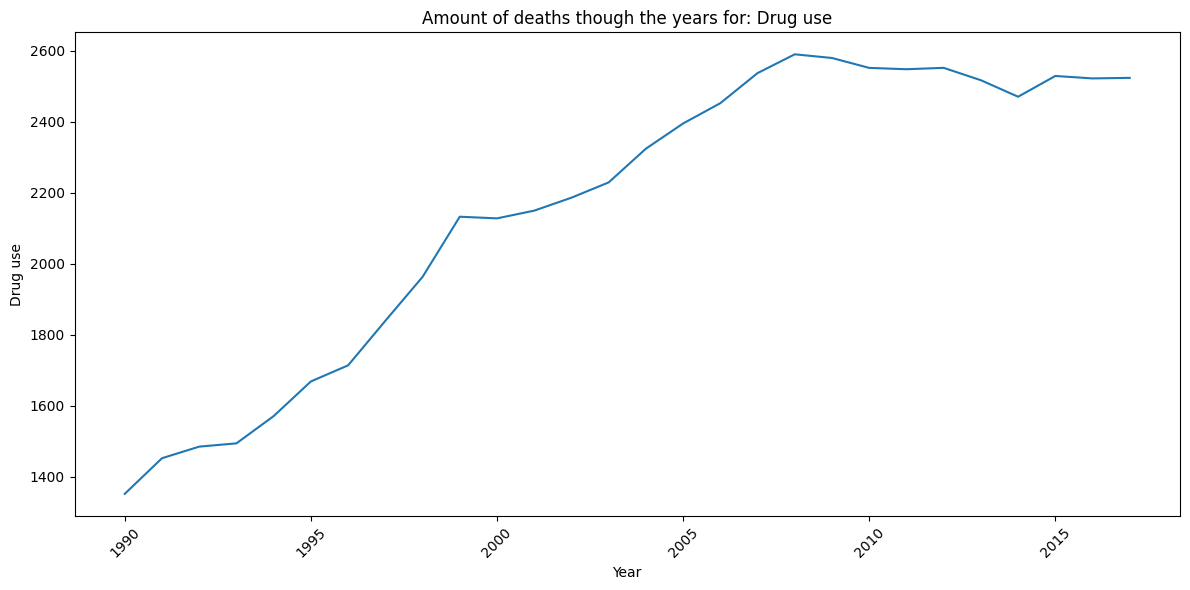

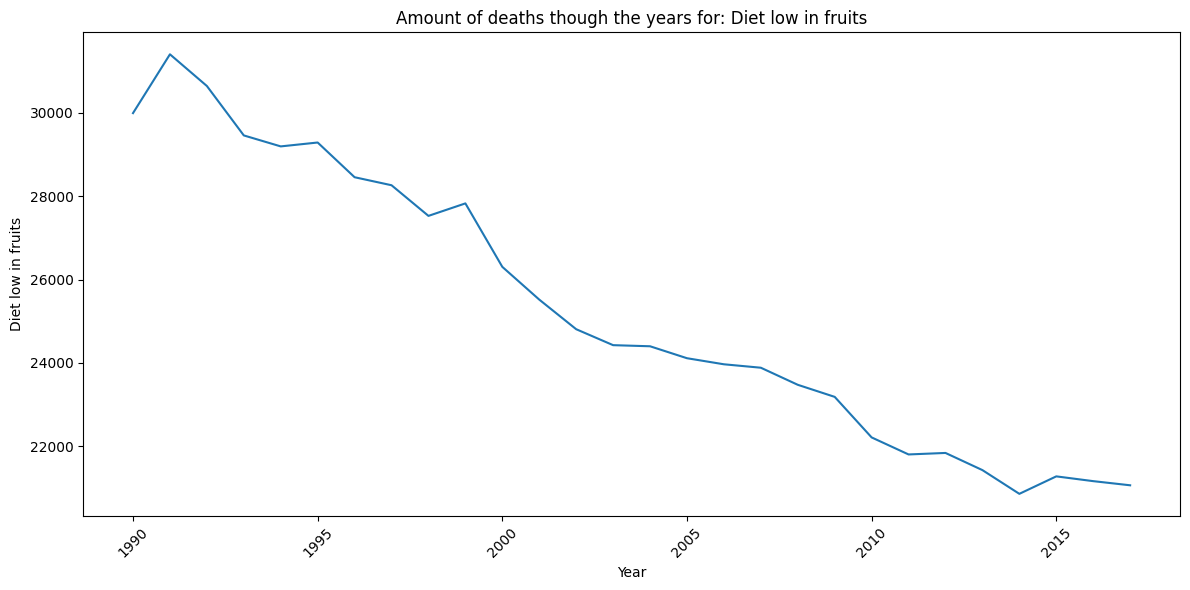

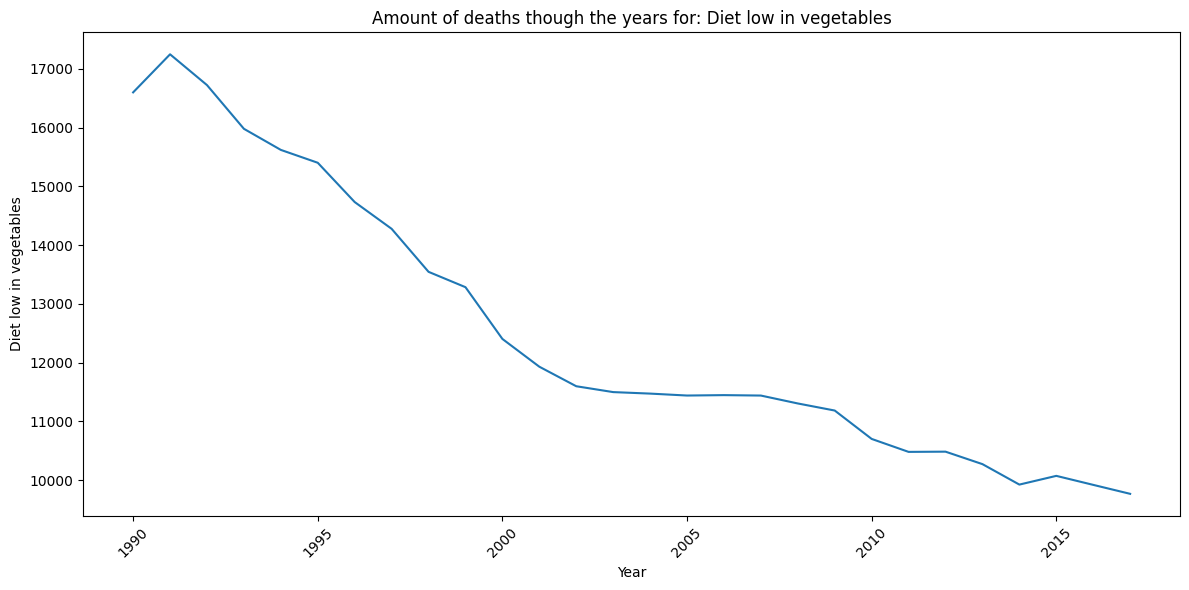

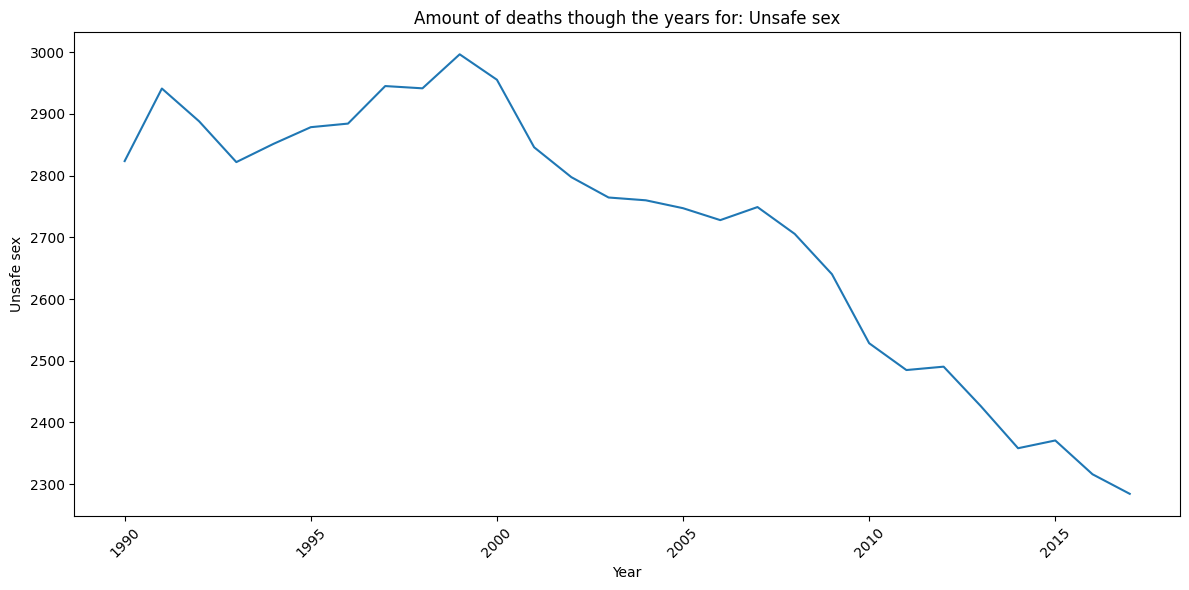

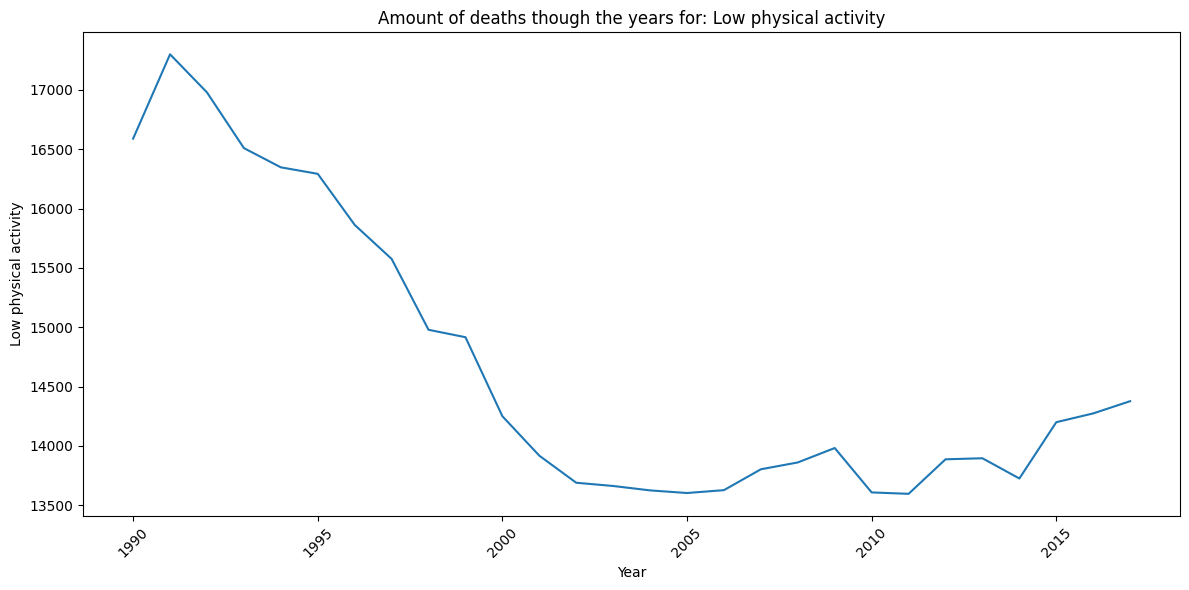

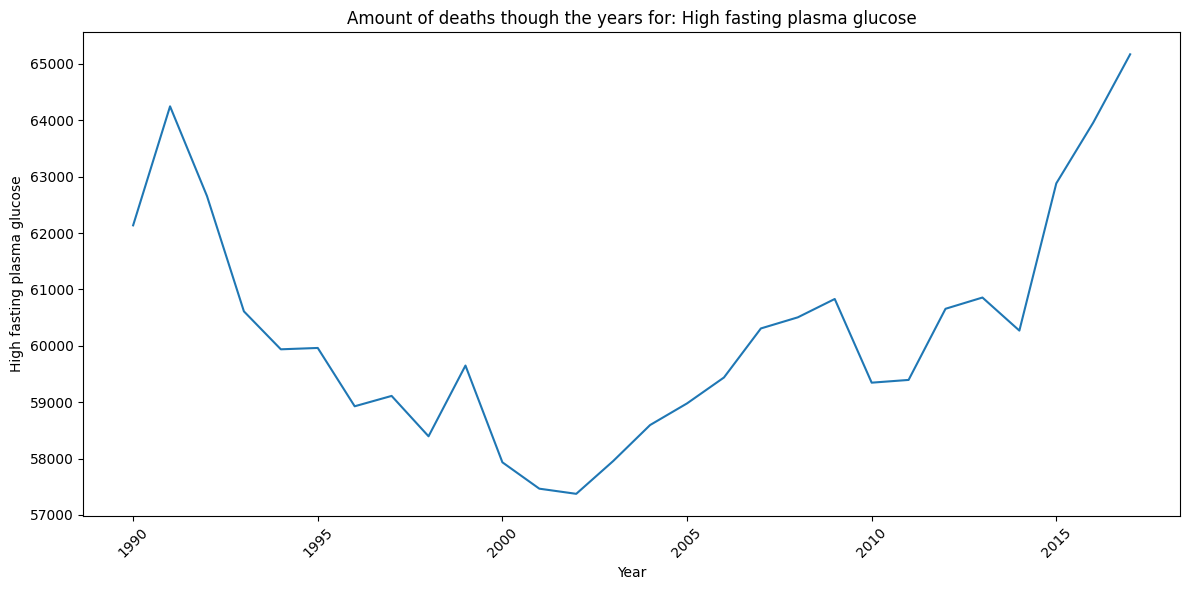

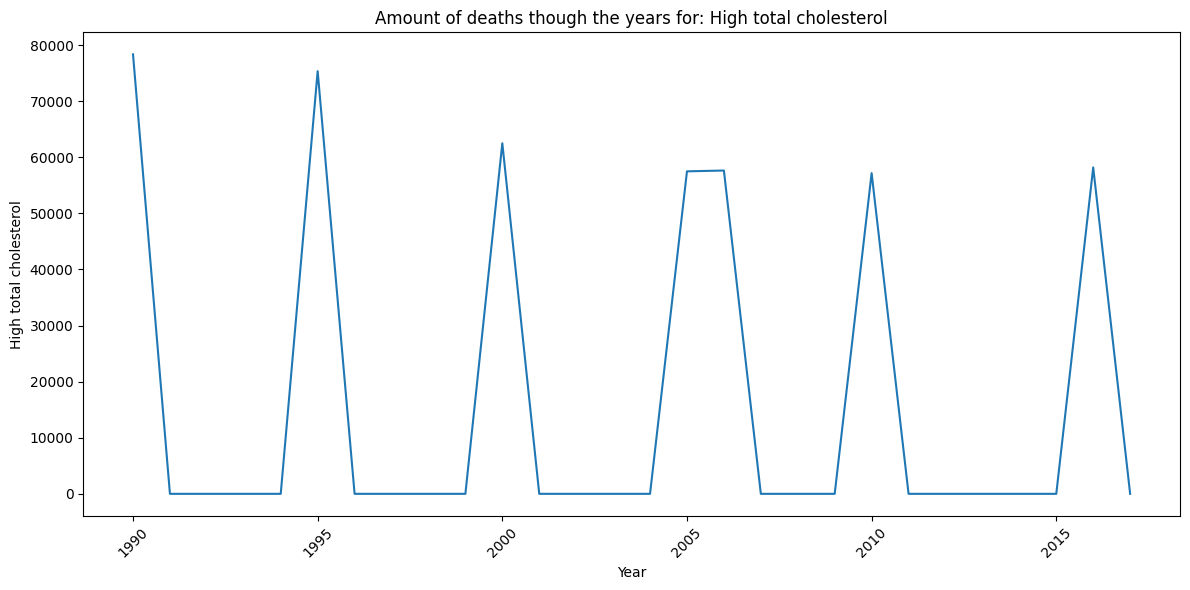

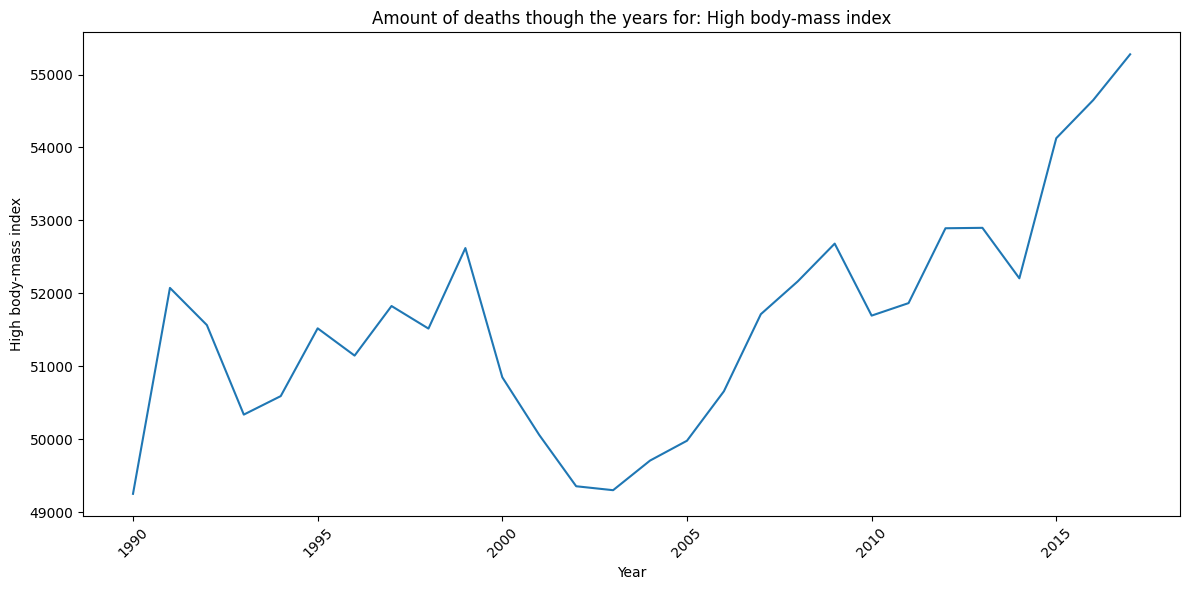

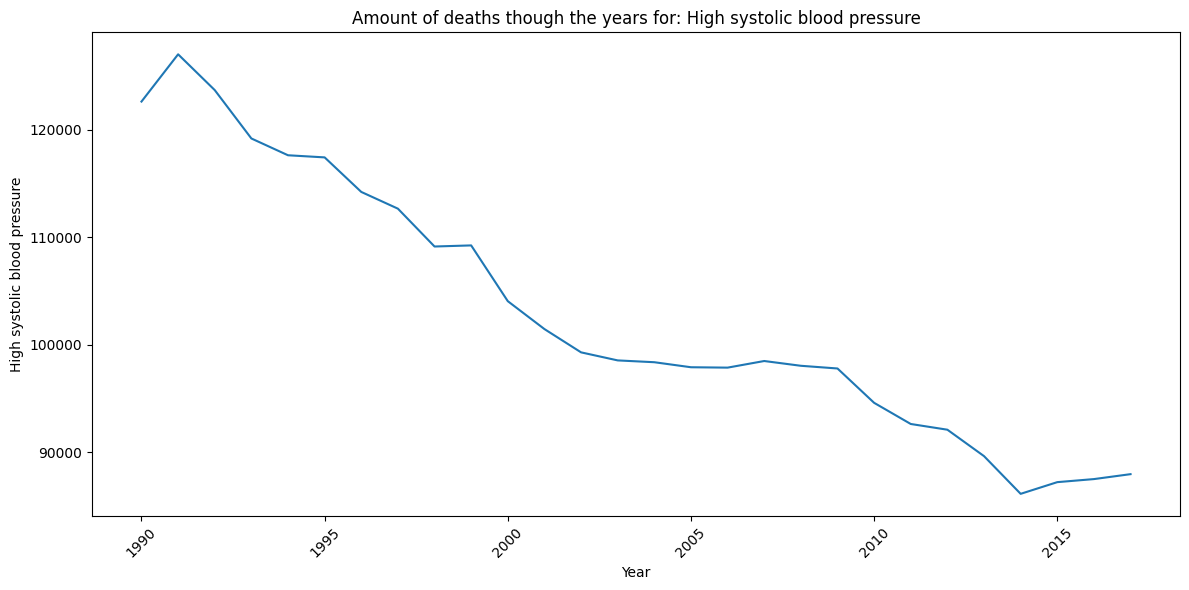

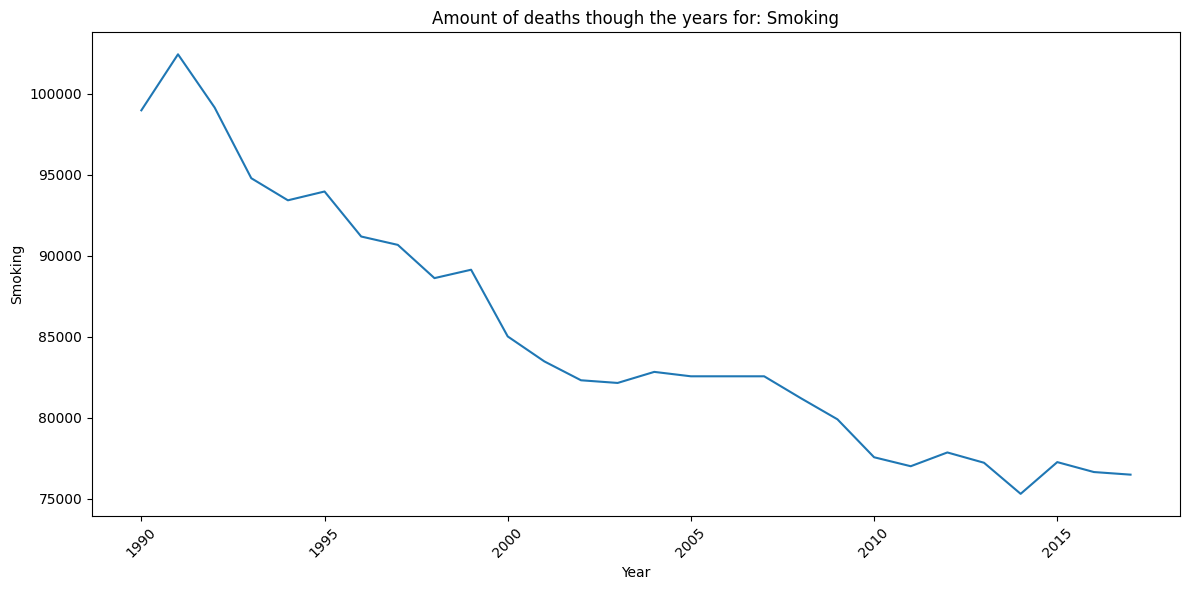

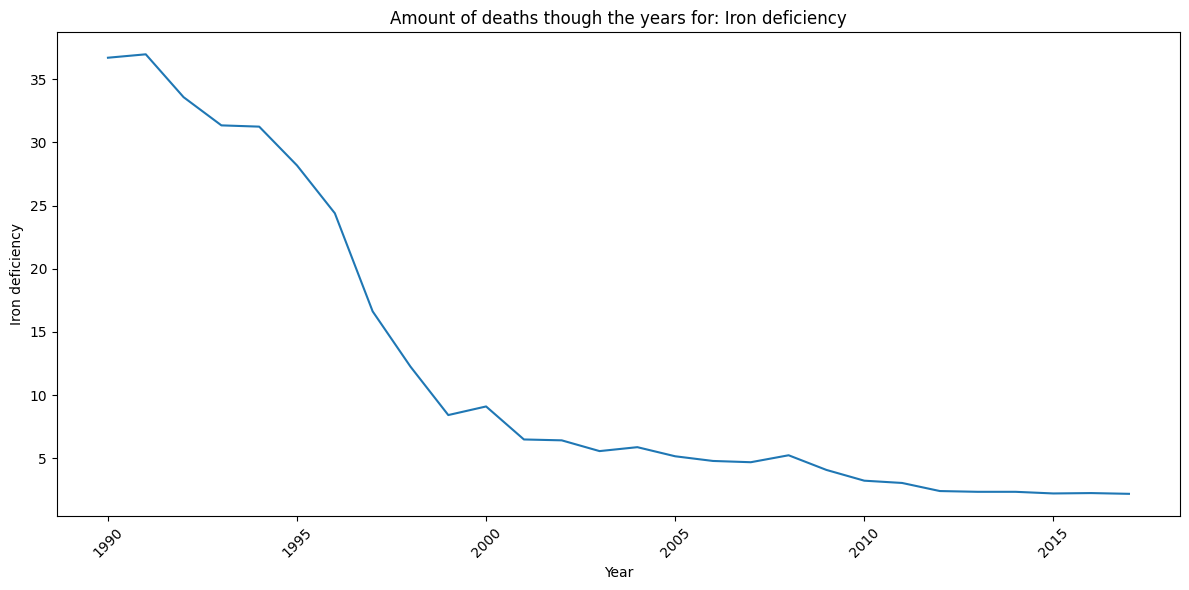

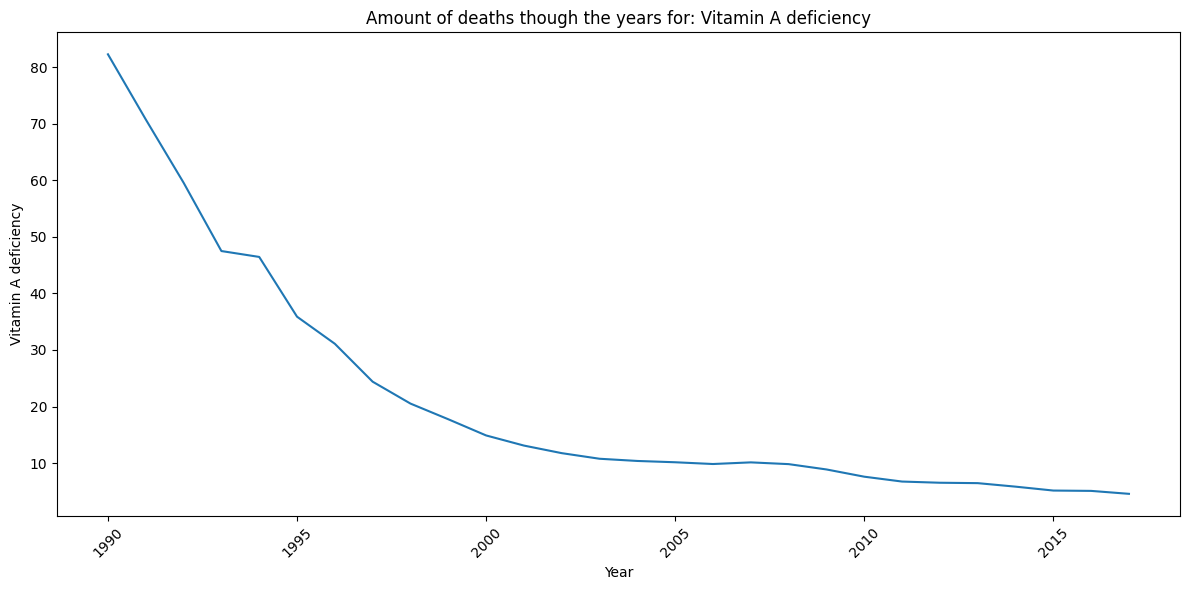

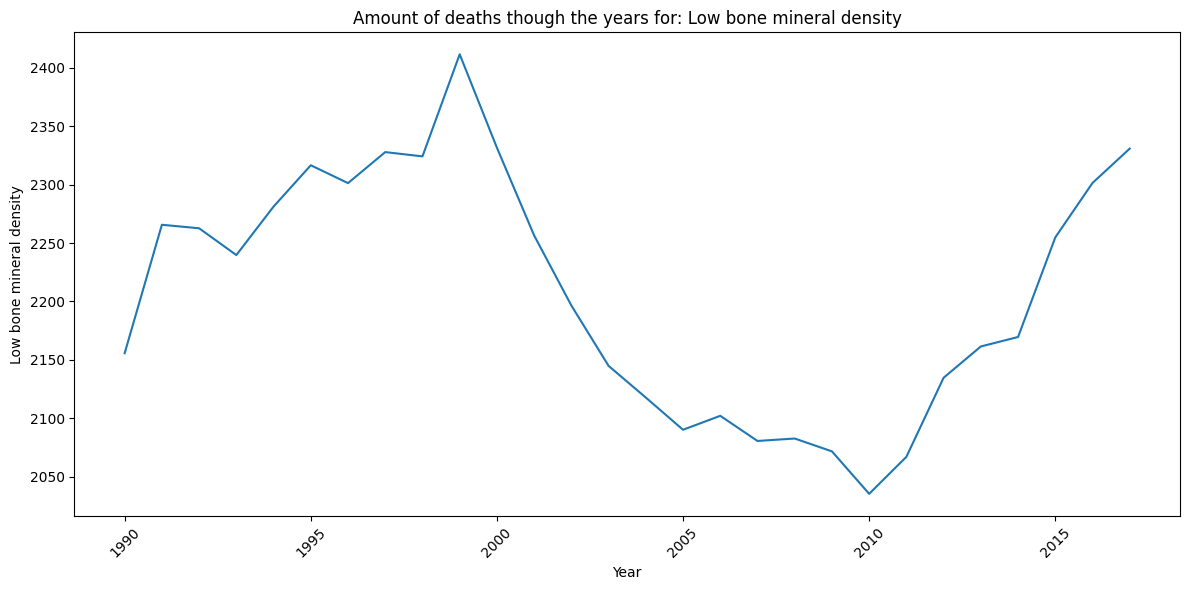

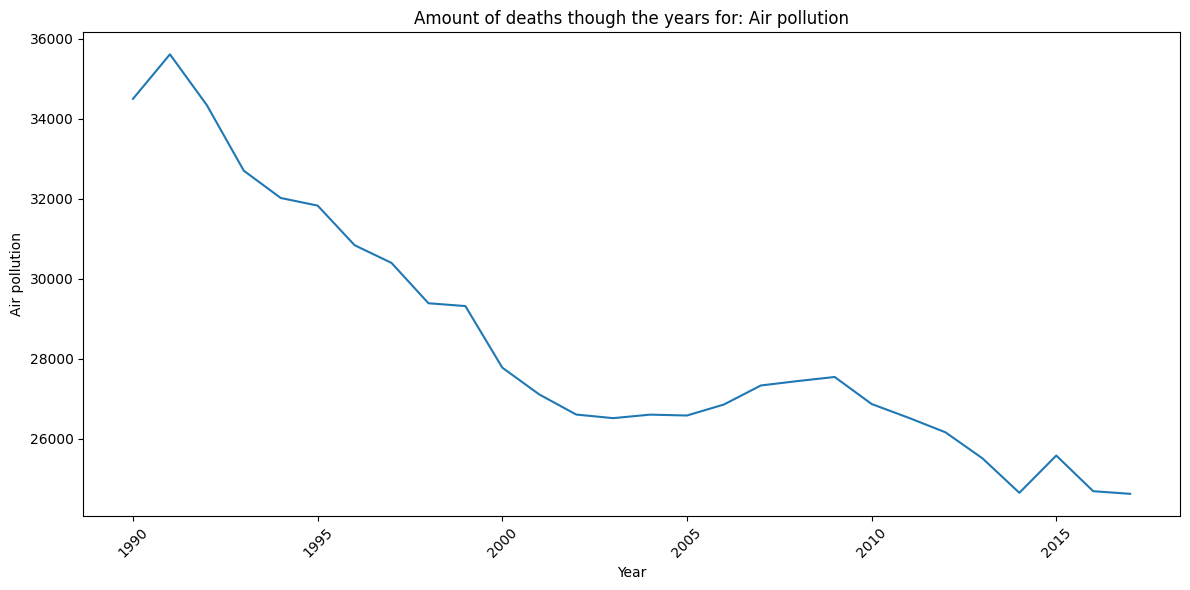

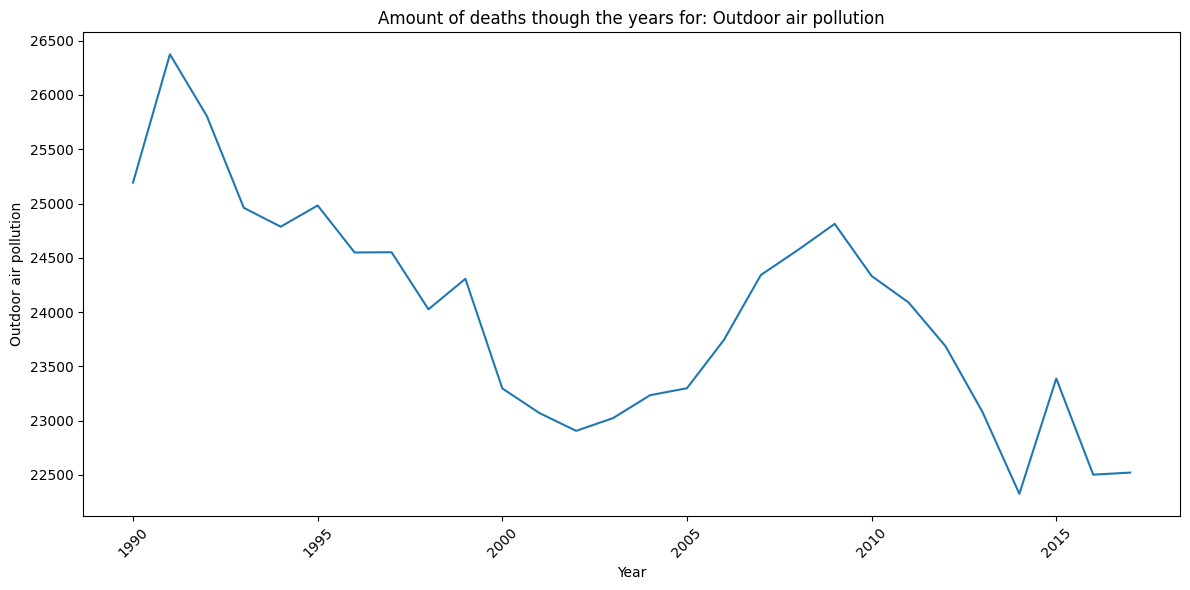

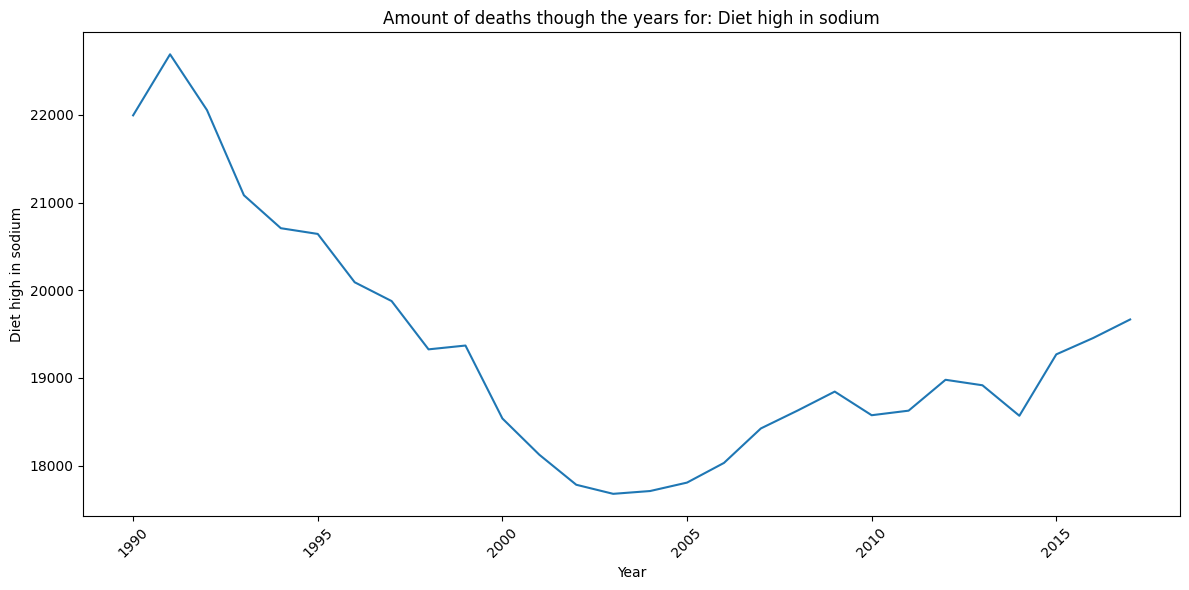

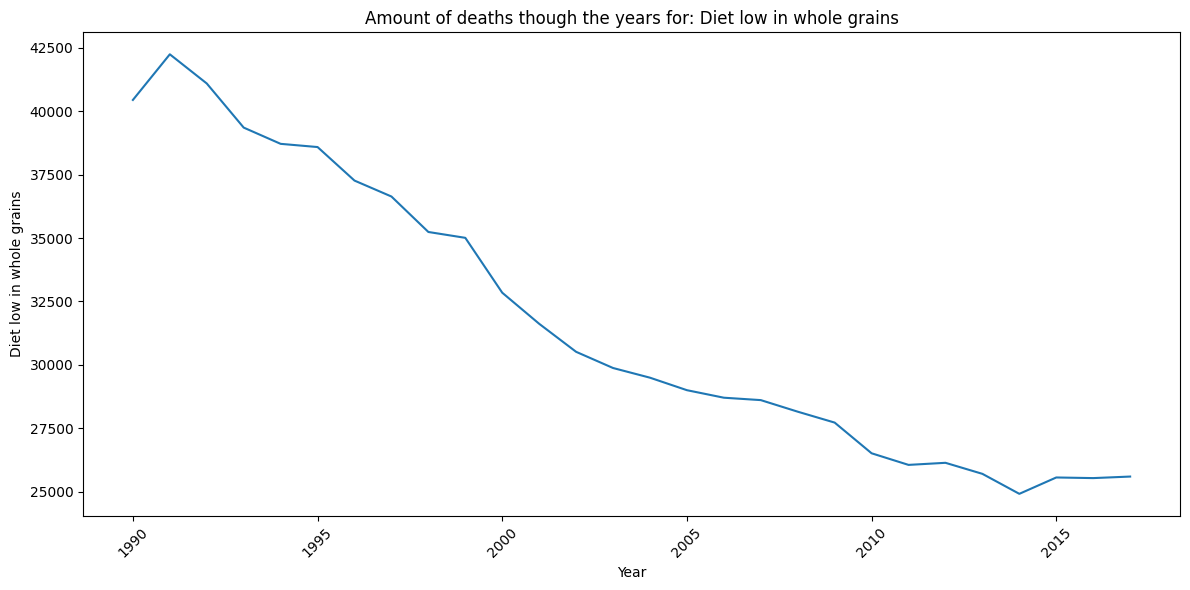

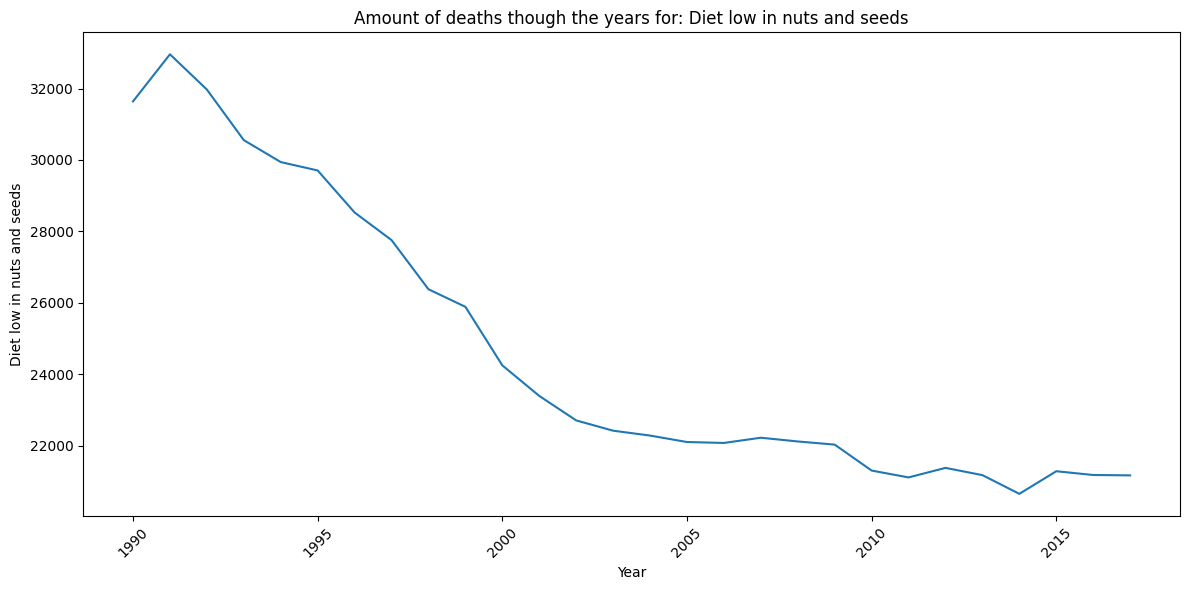

In [ ]:
for col in poland_df.columns[2:]:
  category_series = poland_df[col].reset_index(drop=True)
  category_df = pd.DataFrame(category_series, columns=[col])
  category_df['Year'] = poland_df['Year']
  PolishDeathDataFrameUtility.create_line_plot_through_years(category_df, col, f'Amount of deaths though the years for: {col}')

From the results stated above one can notice that Poland doesn't have a problem with lack of hygiene for breastfeeding mothers, malnutrition across children, unbalanced diet and what surprising - smoking.

Not surprising is amount of deaths caused by alcohol usage. There's also still a problem with obesity and illnesses/problems connected with it.
Unfortunately the plot presenting amount of deaths by high total choresterol is incorrect, because there were problems with procuring data connected with this particular cause.  

Surprising rising trend was present around year 2015 caused by hygiene related causes like unsafe water source, sanitation or no access to handwashing facility. Even though the amount of deaths was small in comparison to other causes, one can see increase in number of deaths related to those causes (related to lack of hygiene) in recent years.
There were also many deaths caused by usage of drugs.

Causes of deaths that we as Poles still need to look for are: alcohol use, drug use, high body-mass index and high fasting plasma glucose (diabetes).

**Correlation Matrix**

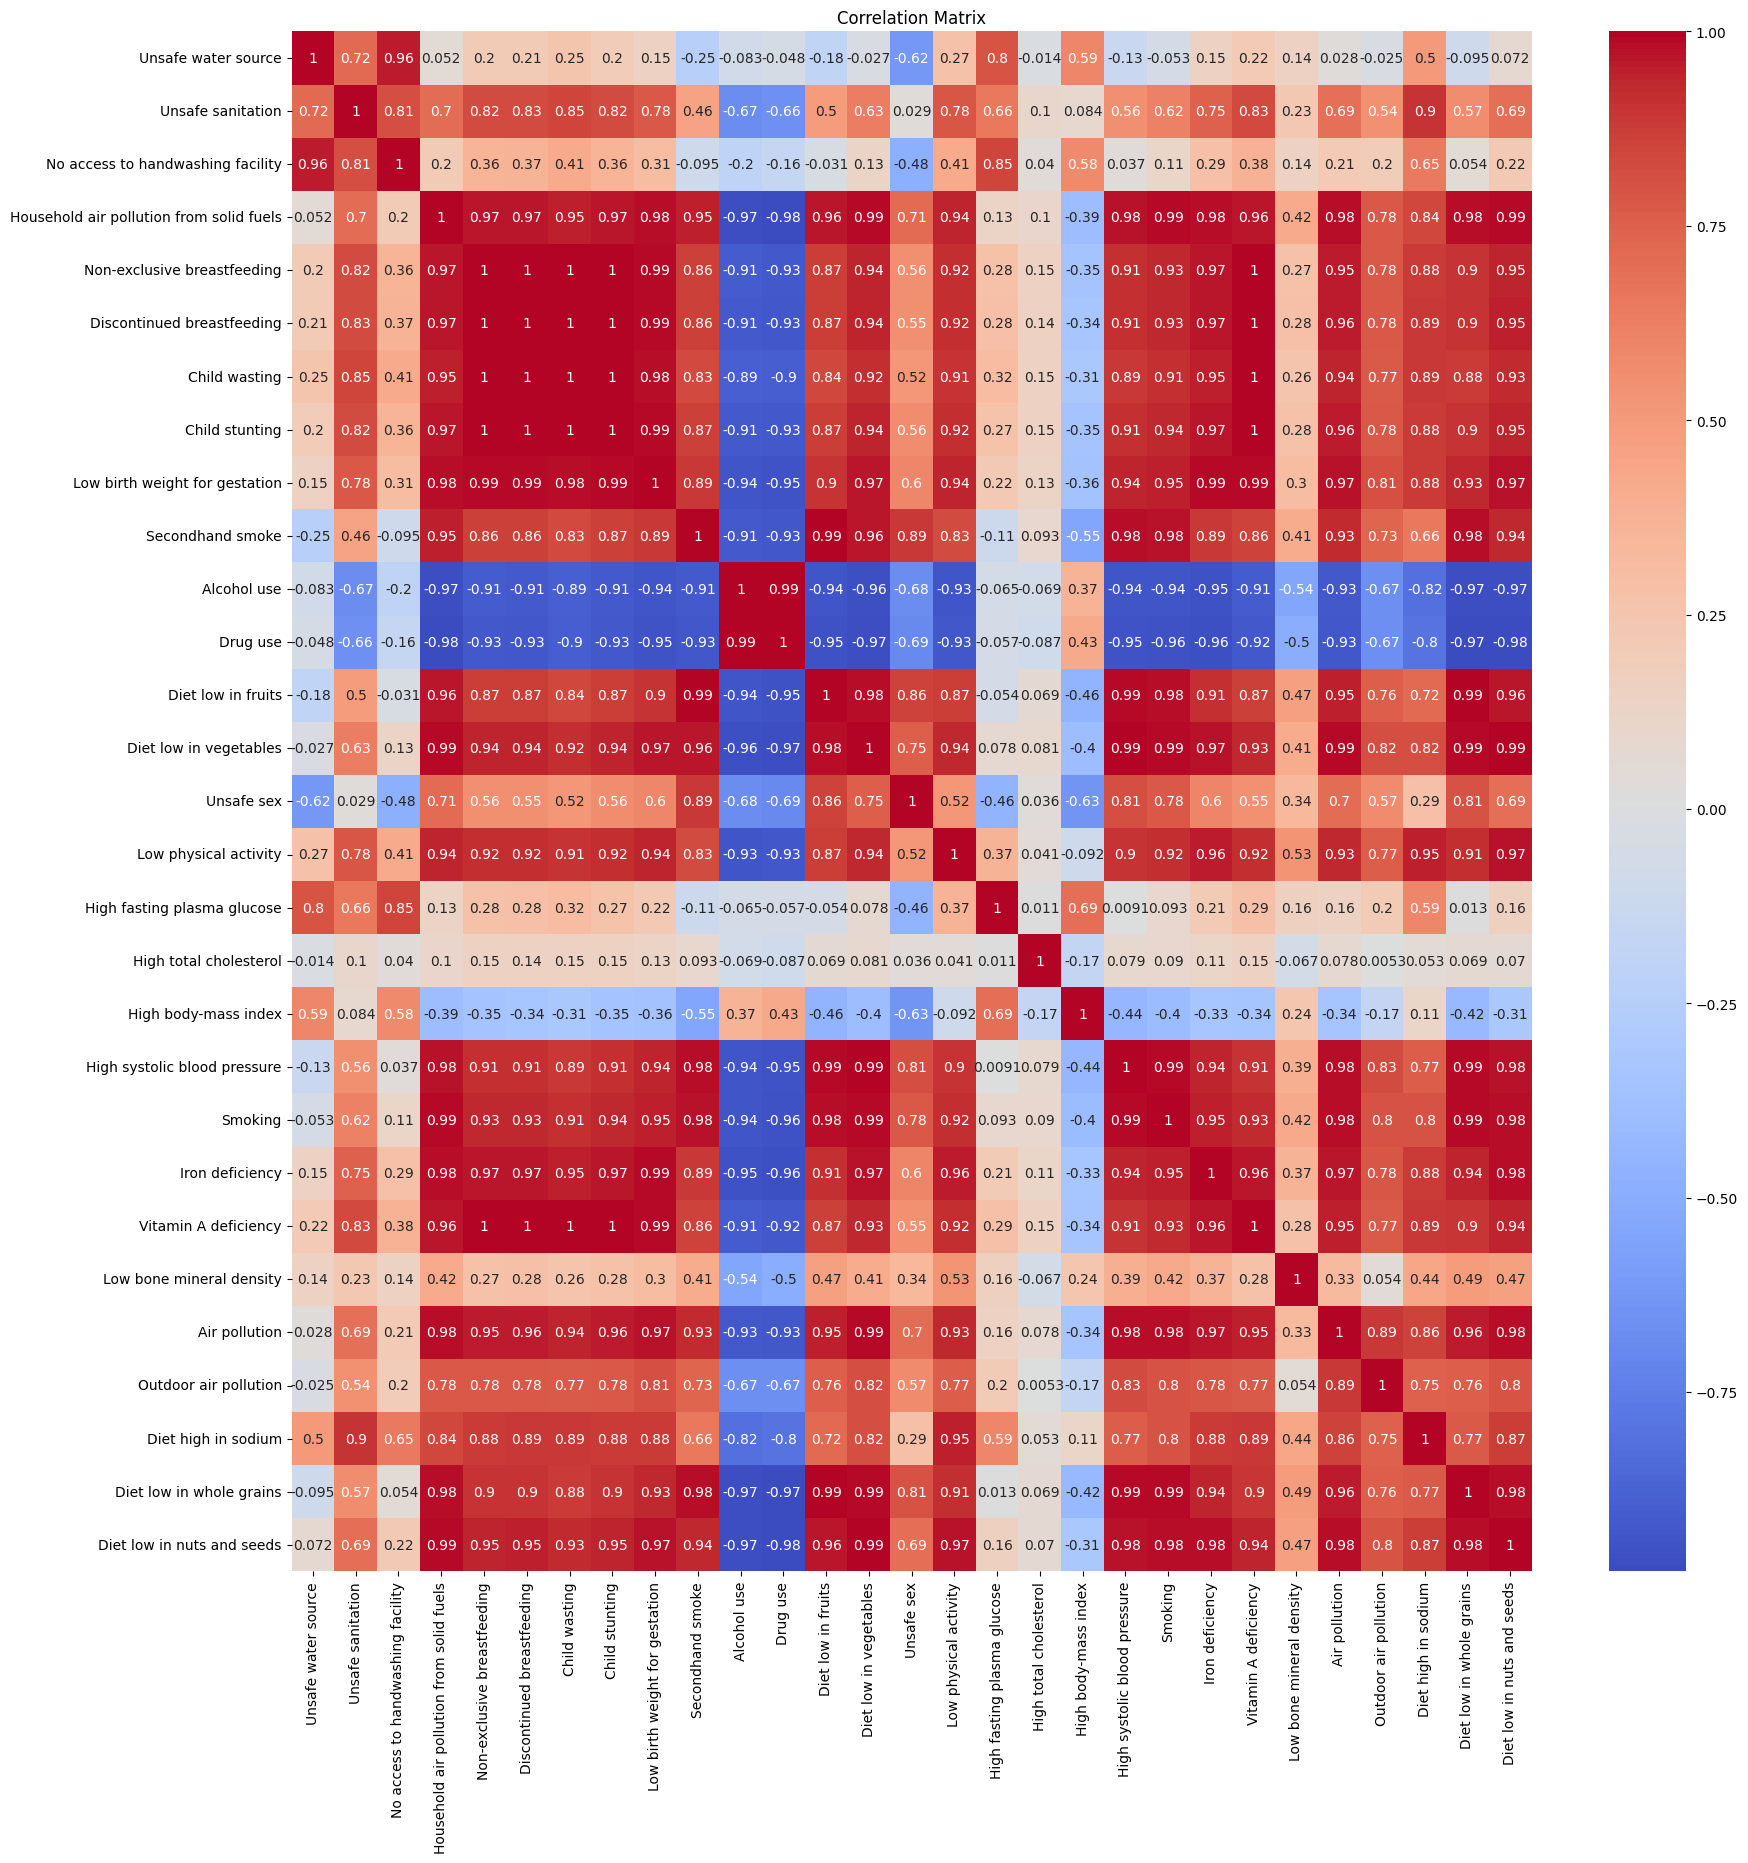

In [ ]:
DataFrameUtility.create_corr_matrix(poland_df, CORR_MATRIX_TITLE)

From the graph shown above, we can conclude a few things.

It seems death causes related to problems with breastfeeding, and children malnutrition are strongly related to many other causes. Unsfafe sanitation, smoking and secondhand smoke, low physical activity, mineral deficiency and unhealthy diets.

Concerning thing about the result is that alcohol and drug usage don't have any correlation to other causes. Unsafe sex or mineral deficiency should be quite connected with alcohol usage. Causes related to smoking are also not related to the alcohol usage, even though it's quite common for Polish people to use both of those stimulants.

Another interesting result is lack of correlation between high body-mass index and high systolic blood pressure

**Values prediction**

In [ ]:
PolishDeathDataFrameUtility.create_predictions(poland_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided,

FORECAST FOR: Unsafe water source
2018-01-01    56.338957
2019-01-01    54.115097
2020-01-01    49.561440
2021-01-01    58.179544
2022-01-01    63.572412
2023-01-01    72.021585
2024-01-01    73.862534
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Unsafe sanitation
2018-01-01    8.966323
2019-01-01    6.603259
2020-01-01    3.934594
2021-01-01    1.931495
2022-01-01    1.293729
2023-01-01    0.264222
2024-01-01    0.738550
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: No access to handwashing facility
2018-01-01    66.451926
2019-01-01    65.848857
2020-01-01    64.345197
2021-01-01    63.721326
2022-01-01    63.115973
2023-01-01    62.895015
2024-01-01    62.567085
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Household air pollution from solid fuels
2018-01-01    2264.981626
2019-01-01    2124.627558
2020-01-01    2071.531652
2021-01-01    2050.799418
2022-01-01    2008.609992
2023-01-01    1932.423538
2024-01-01    1883.943417
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: Non-exclusive breastfeeding
2018-01-01    6.038253
2019-01-01    5.626990
2020-01-01    5.247458
2021-01-01    4.866736
2022-01-01    4.517111
2023-01-01    4.149786
2024-01-01    3.809705
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Discontinued breastfeeding
2018-01-01    0.340842
2019-01-01    0.357968
2020-01-01    0.369249
2021-01-01    0.394117
2022-01-01    0.421488
2023-01-01    0.446419
2024-01-01    0.479317
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Child wasting
2018-01-01    104.354052
2019-01-01    101.617286
2020-01-01     99.185340
2021-01-01     97.157951
2022-01-01     94.488372
2023-01-01     92.766859
2024-01-01     90.372833
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: Child stunting
2018-01-01    3.094063
2019-01-01    2.821523
2020-01-01    2.581463
2021-01-01    2.327399
2022-01-01    2.096890
2023-01-01    1.857406
2024-01-01    1.631736
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-

FORECAST FOR: Low birth weight for gestation
2018-01-01    561.411338
2019-01-01    525.352835
2020-01-01    499.357762
2021-01-01    470.053100
2022-01-01    441.467539
2023-01-01    414.662657
2024-01-01    389.317693
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Secondhand smoke
2018-01-01    7794.594413
2019-01-01    7831.042226
2020-01-01    7815.977666
2021-01-01    7823.375090
2022-01-01    7770.854026
2023-01-01    7768.943651
2024-01-01    7764.400725
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Alcohol use
2018-01-01    27579.485459
2019-01-01    27590.025650
2020-01-01    27673.513226
2021-01-01    27776.039388
2022-01-01    27800.611615
2023-01-01    27792.760012
2024-01-01    27799.170759
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Drug use
2018-01-01    2519.978708
2019-01-01    2532.386166
2020-01-01    2534.486913
2021-01-01    2536.603045
2022-01-01    2538.099023
2023-01-01    2541.903912
2024-01-01    2543.9

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: Diet low in fruits
2018-01-01    20953.448278
2019-01-01    20979.347567
2020-01-01    20994.004689
2021-01-01    20999.843392
2022-01-01    20989.068636
2023-01-01    20986.587753
2024-01-01    20987.174506
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Diet low in vegetables
2018-01-01    9593.329875
2019-01-01    9636.271018
2020-01-01    9639.994454
2021-01-01    9640.303891
2022-01-01    9600.777136
2023-01-01    9617.798643
2024-01-01    9628.345551
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: Unsafe sex
2018-01-01    2288.451910
2019-01-01    2268.578158
2020-01-01    2257.976163
2021-01-01    2256.106679
2022-01-01    2246.358493
2023-01-01    2242.534046
2024-01-01    2241.261987
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Low physical activity
2018-01-01    14317.357781
2019-01-01    14418.218269
2020-01-01    14404.091553
2021-01-01    14408.909945
2022-01-01    14370.188978
2023-01-01    14388.646368
2024-01-01    14381.338774
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: High fasting plasma glucose
2018-01-01    65049.528336
2019-01-01    64897.727626
2020-01-01    64788.900657
2021-01-01    64777.163573
2022-01-01    64781.656767
2023-01-01    64791.394743
2024-01-01    64794.748668
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: High total cholesterol
2018-01-01     1293.121608
2019-01-01     1866.294264
2020-01-01     4959.628440
2021-01-01    39159.483509
2022-01-01    12886.658312
2023-01-01      247.943070
2024-01-01     3755.983185
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: High body-mass index
2018-01-01    55216.507622
2019-01-01    55200.125724
2020-01-01    55223.462126
2021-01-01    55262.258742
2022-01-01    55281.015908
2023-01-01    55279.224591
2024-01-01    55276.428755
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: High systolic blood pressure
2018-01-01    87931.875011
2019-01-01    87903.098241
2020-01-01    87880.152206
2021-01-01    87876.990803
2022-01-01    8

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: Smoking
2018-01-01    76401.516626
2019-01-01    76412.101892
2020-01-01    76441.568036
2021-01-01    76445.834045
2022-01-01    76444.021389
2023-01-01    76441.487163
2024-01-01    76440.956960
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Iron deficiency
2018-01-01    2.218932
2019-01-01    2.158702
2020-01-01    2.168529
2021-01-01    2.131172
2022-01-01    2.143366
2023-01-01    2.115667
2024-01-01    2.122736
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Vitamin A deficiency
2018-01-01    4.321125
2019-01-01    4.055965
2020-01-01    3.776714
2021-01-01    3.529826
2022-01-01    3.305737
2023-01-01    3.066451
2024-01-01    2.855387
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: Low bone mineral density
2018-01-01    2351.238092
2019-01-01    2379.253619
2020-01-01    2389.658088
2021-01-01    2395.840255
2022-01-01    2402.015679
2023-01-01    2407.982505
2024-01-01    2409.071921
Freq: AS-JAN, Name: predicted_mean, dtype: float64
FORECAST FOR: Air pollution
2018-01-01    24593.937497
2019-01-01    24702.425632
2020-01-01    24702.900664
2021-01-01    24713.768654
2022-01-01    24705.571515
2023-01-01    24705.167090
2024-01-01    24702.757579
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be use

FORECAST FOR: Outdoor air pollution
2018-01-01    22416.775491
2019-01-01    22580.766310
2020-01-01    22542.143761
2021-01-01    22566.072602
2022-01-01    22545.917164
2023-01-01    22556.410257
2024-01-01    22549.830489
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


FORECAST FOR: Diet high in sodium
2018-01-01    19548.101757
2019-01-01    19578.643440
2020-01-01    19538.484010
2021-01-01    19559.255712
2022-01-01    19532.225341
2023-01-01    19541.093301
2024-01-01    19535.193954
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


FORECAST FOR: Diet low in whole grains
2018-01-01    25544.770873
2019-01-01    25545.585494
2020-01-01    25547.748472
2021-01-01    25553.207343
2022-01-01    25552.982174
2023-01-01    25552.208845
2024-01-01    25551.780393
Freq: AS-JAN, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


FORECAST FOR: Diet low in nuts and seeds
2018-01-01    21085.207712
2019-01-01    21118.946268
2020-01-01    21119.415119
2021-01-01    21125.074766
2022-01-01    21118.832250
2023-01-01    21119.856713
2024-01-01    21119.631595
Freq: AS-JAN, Name: predicted_mean, dtype: float64


Predictions for years 2018-2024 are made using ARIMA Model.

In many cases, model predicts rather small fluctuations in the values.
Usually the trend of data remains the same.
In case of causes that were on a downward trend, their values gets lower with years.
Similarly for those causes that where on the rise in recent years.

Models like that, can't predict such impactful events like pandemic that happened few years ago. We can take this data as an indicator what it would have been like if the pandemic hadn't started.